In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222776, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222775, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225,-25.518358
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260,-25.517942
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260,-25.517942
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517910
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450,-25.517942


In [ ]:
X = df.drop('close', axis=1)
X.head()

,open,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225,-25.518358
2020-01-01 17:05:00,1.12125,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260,-25.517942
2020-01-01 17:10:00,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260,-25.517942
2020-01-01 17:15:00,1.12127,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517910
2020-01-01 17:20:00,1.12144,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450,-25.517942


In [ ]:
y=pd.DataFrame(df['close'])
y.head()

,close
timestamp,
2020-01-01 17:00:00,1.12125
2020-01-01 17:05:00,1.12127
2020-01-01 17:10:00,1.12127
2020-01-01 17:15:00,1.12146
2020-01-01 17:20:00,1.12146


In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178220
178220
22000
22000
22555
22555


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

print(x_train)



[[4.30075645e-01 4.31535721e-01 4.29138184e-01 ... 3.81944478e-02
  4.30011749e-01 1.08569860e-04]
 [4.30326939e-01 4.32488441e-01 4.28534985e-01 ... 2.31481483e-03
  4.30187702e-01 1.16556883e-04]
 [4.30427074e-01 4.32387829e-01 4.28534985e-01 ... 4.62962966e-03
  4.30187702e-01 1.16556883e-04]
 ...
 [1.18328094e-01 1.19436741e-01 1.15982056e-01 ... 3.58796306e-02
  1.17236614e-01 3.65299702e-01]
 [1.17375374e-01 1.19737625e-01 1.16283417e-01 ... 3.58796306e-02
  1.17488384e-01 3.65299702e-01]
 [1.18629456e-01 1.18484020e-01 1.16032124e-01 ... 5.90277798e-02
  1.16760254e-01 3.65299702e-01]]


In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178195, 24, 12)
(21975, 24, 12)
(22530, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178195, 1)
(21975, 1)
(22530, 1)


array([[0.433537  ],
       [0.43318605],
       [0.43218327],
       ...,
       [0.11842871],
       [0.11737537],
       [0.11872959]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.433537  , 0.43318605, 0.43218327, ..., 0.11842871, 0.11737537,
       0.11872959], dtype=float32)

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 188.5966 - mae: 1.6353 - mse: 188.5966 - root_mean_squared_error: 13.7330 - mape: 2304.5352
Epoch 1: val_mse improved from inf to 0.00394, saving model to weights.best.hdf5
463/463 [==============================] - 292s 615ms/step - loss: 188.5966 - mae: 1.6353 - mse: 188.5966 - root_mean_squared_error: 13.7330 - mape: 2304.5352 - val_loss: 0.0039 - val_mae: 0.0424 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0628 - val_mape: 9748.5342
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 950.4366
Epoch 2: val_mse improved from 0.00394 to 0.00151, saving model to weights.best.hdf5
463/463 [==============================] - 283s 611ms/step - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 950.4366 - val_loss: 0.0015 - val_mae: 0.0262 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0

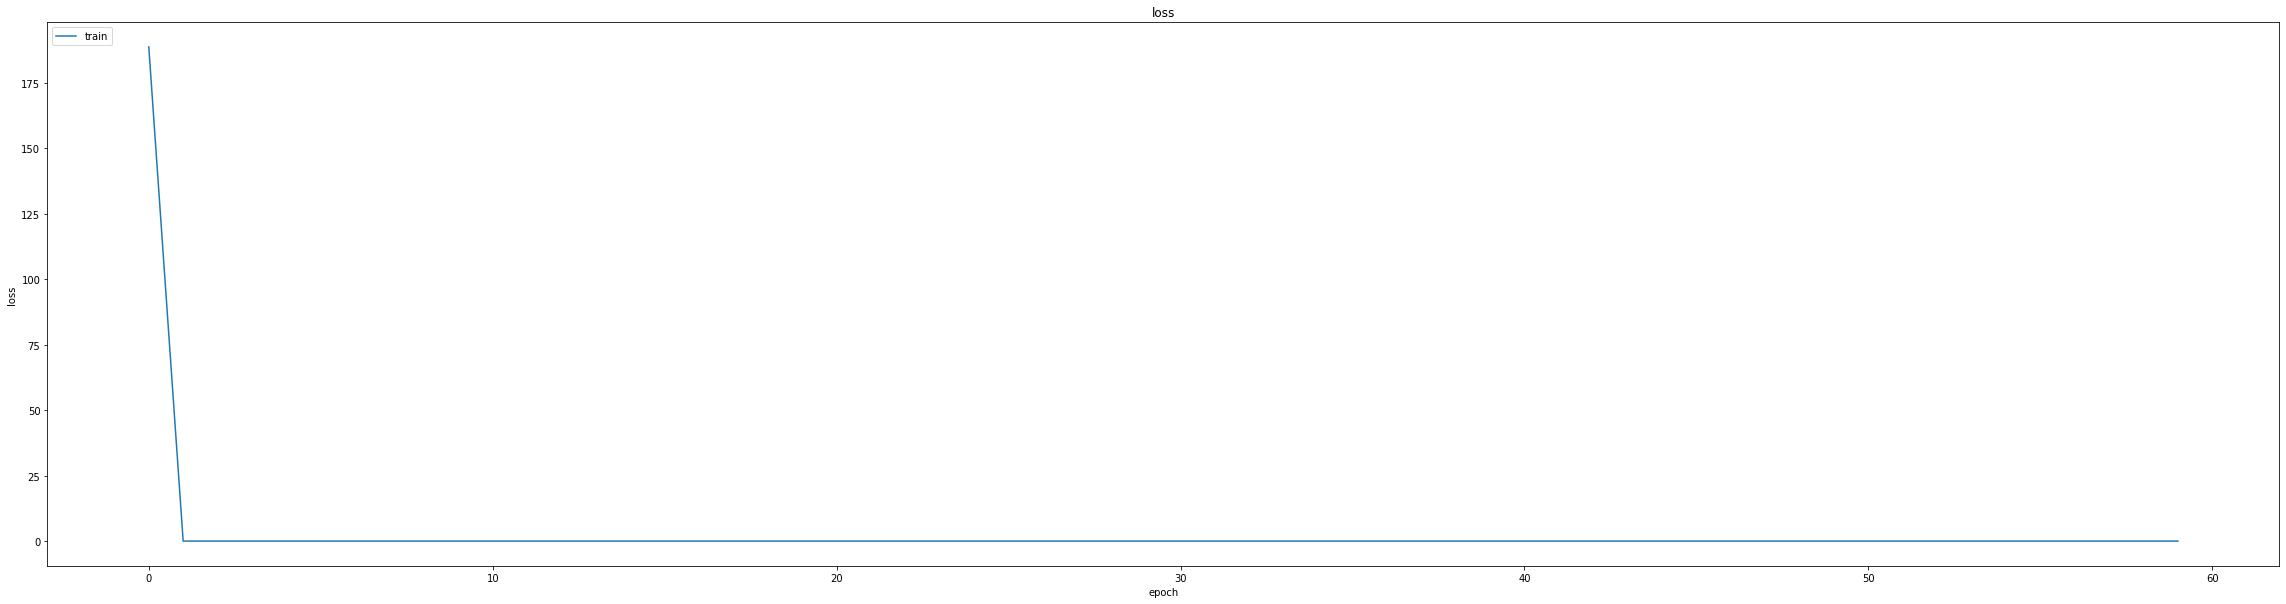

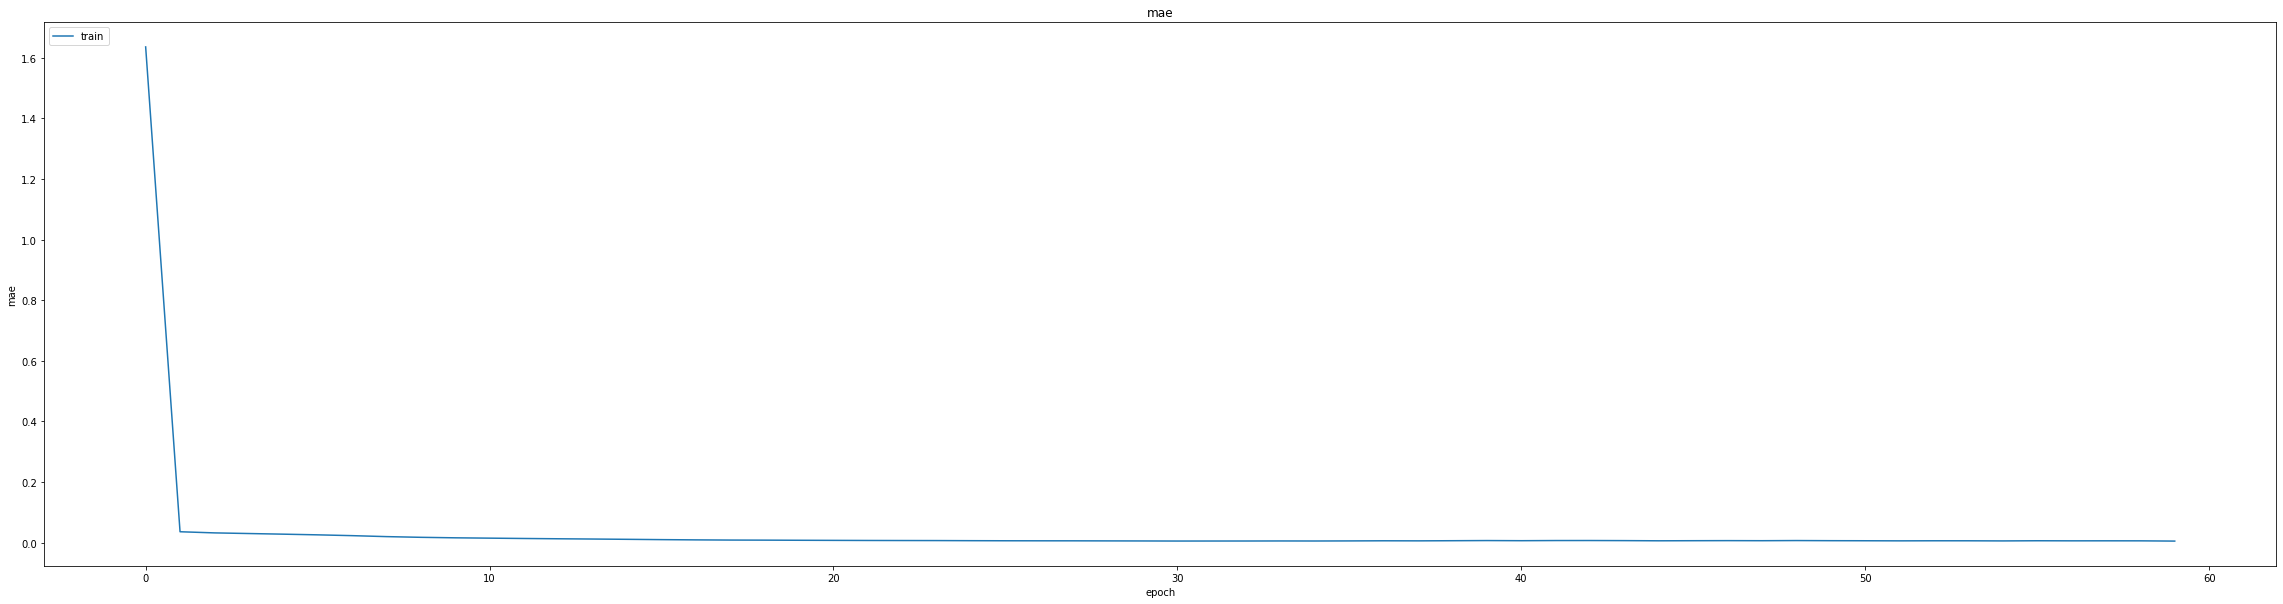

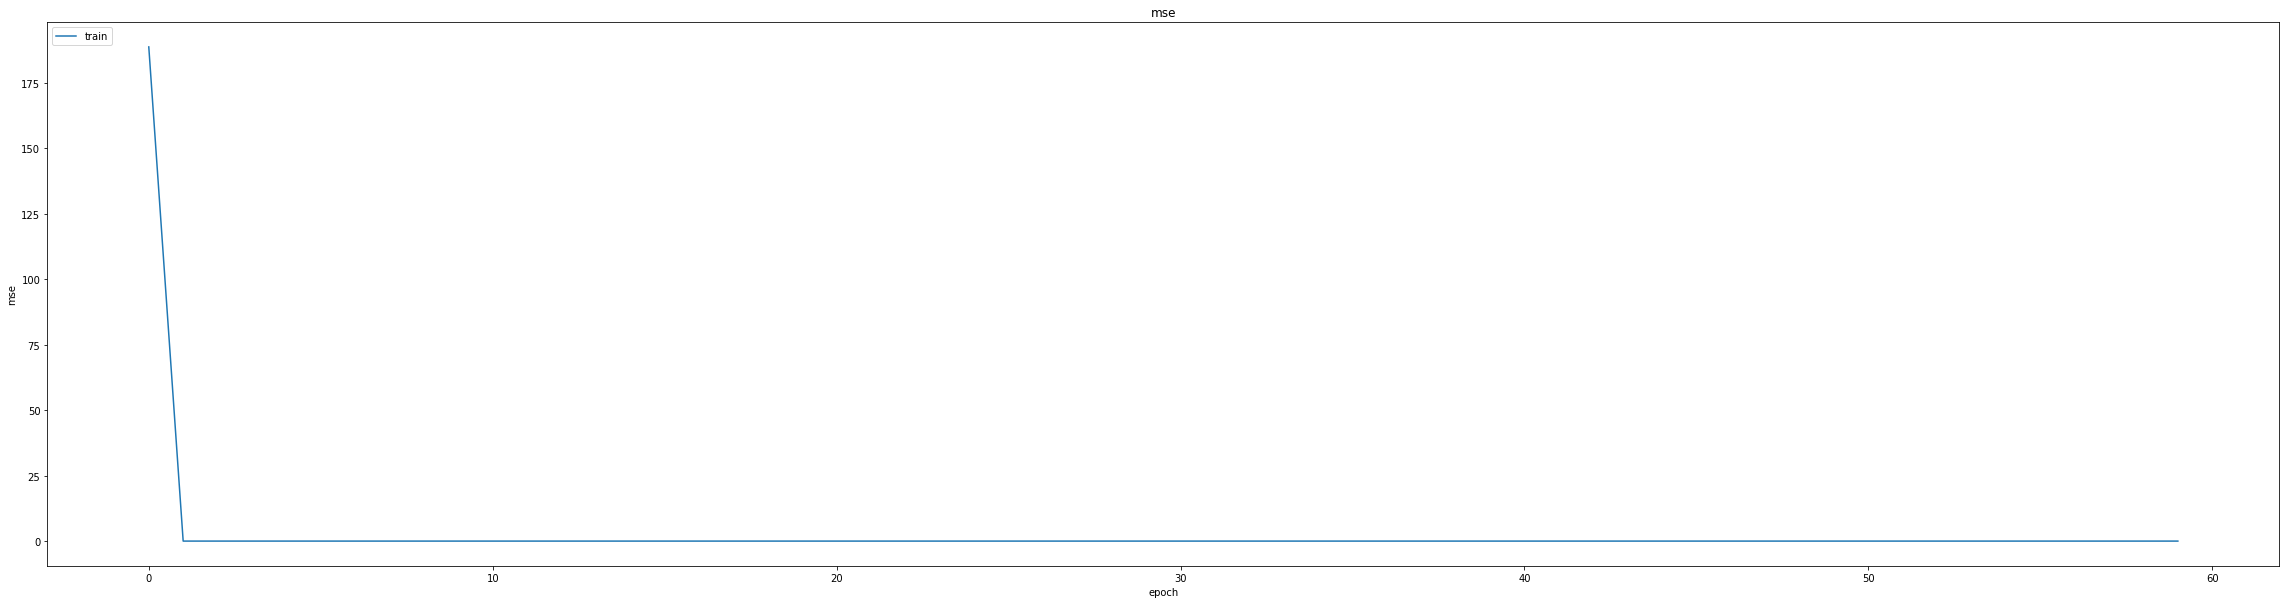

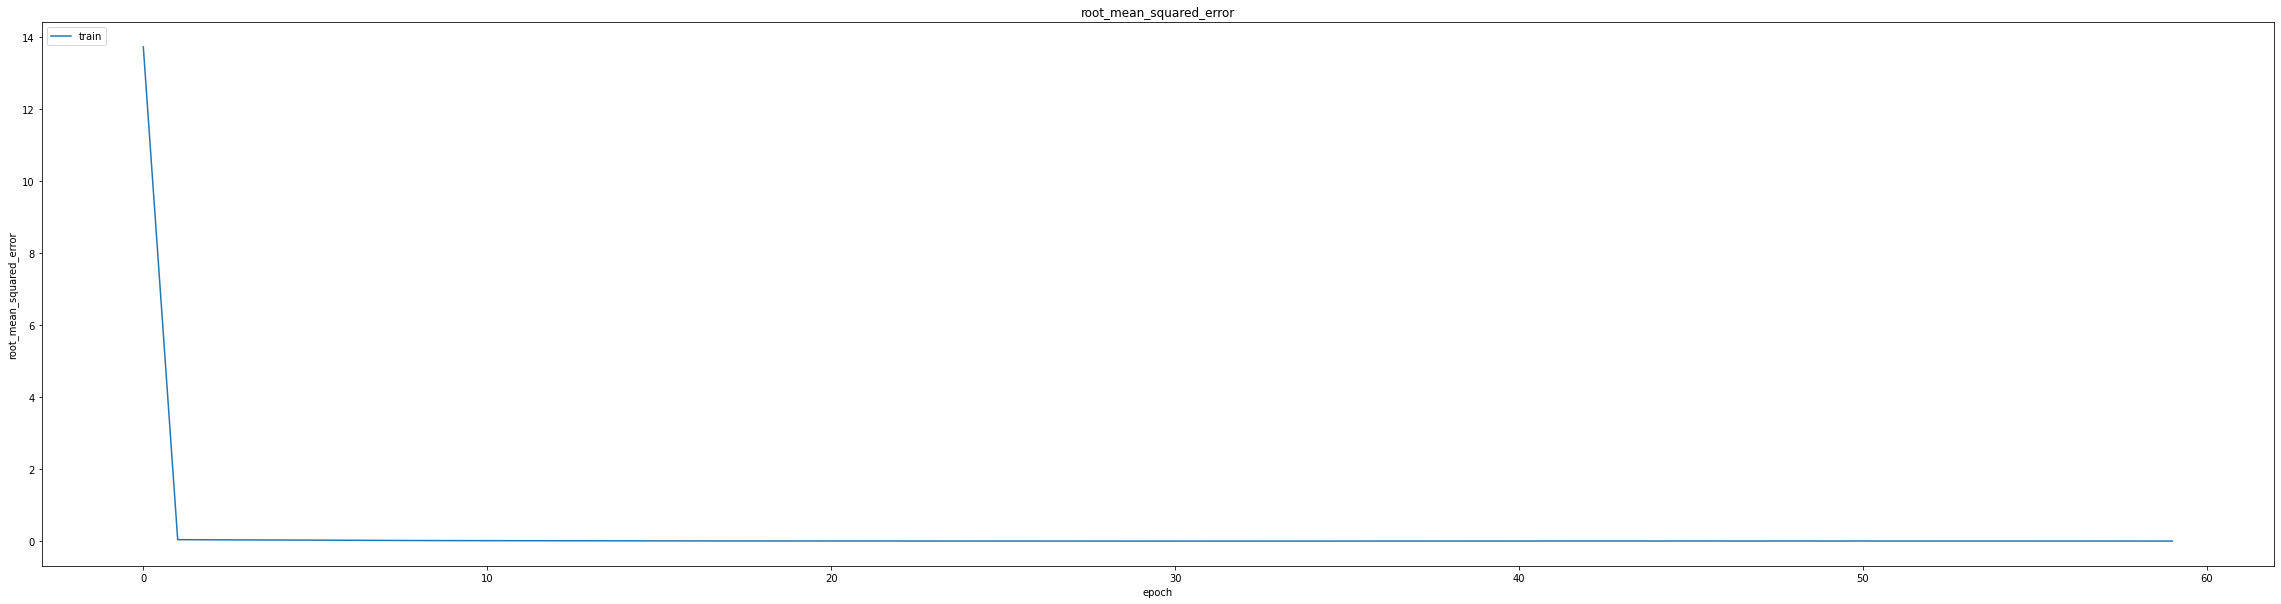

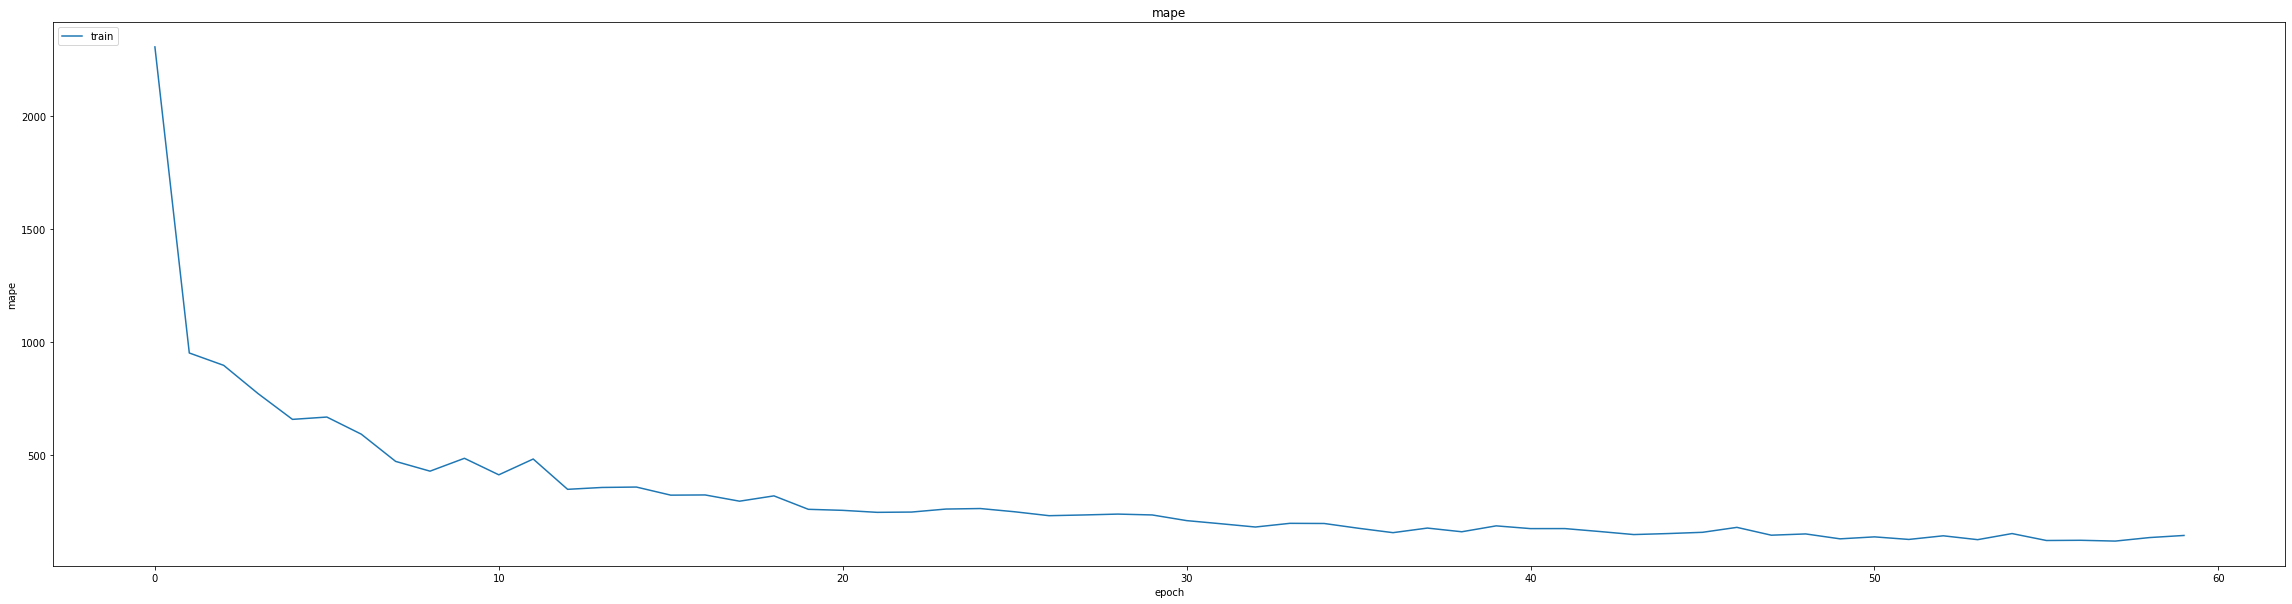

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006053471472114325
0.009027348831295967
687/687 [==============================] - 24s 32ms/step
0.9985887580650954


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0113 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 194.8766
Epoch 1: val_mse did not improve from 0.00008
463/463 [==============================] - 289s 610ms/step - loss: 0.0011 - mae: 0.0113 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 194.8766 - val_loss: 9.7516e-05 - val_mae: 0.0069 - val_mse: 9.7516e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2343.7974 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.9283e-05 - mae: 0.0034 - mse: 1.9283e-05 - root_mean_squared_error: 0.0044 - mape: 129.7591
Epoch 2: val_mse did not improve from 0.00008
463/463 [==============================] - 282s 608ms/step - loss: 1.9283e-05 - mae: 0.0034 - mse: 1.9283e-05 - root_mean_squared_error: 0.0044 - mape: 129.7591 - val_loss: 8.8985e-05 - val_mae: 0.0065 - val_mse: 8.8985e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 2382.4954 - lr: 0.0010
lr

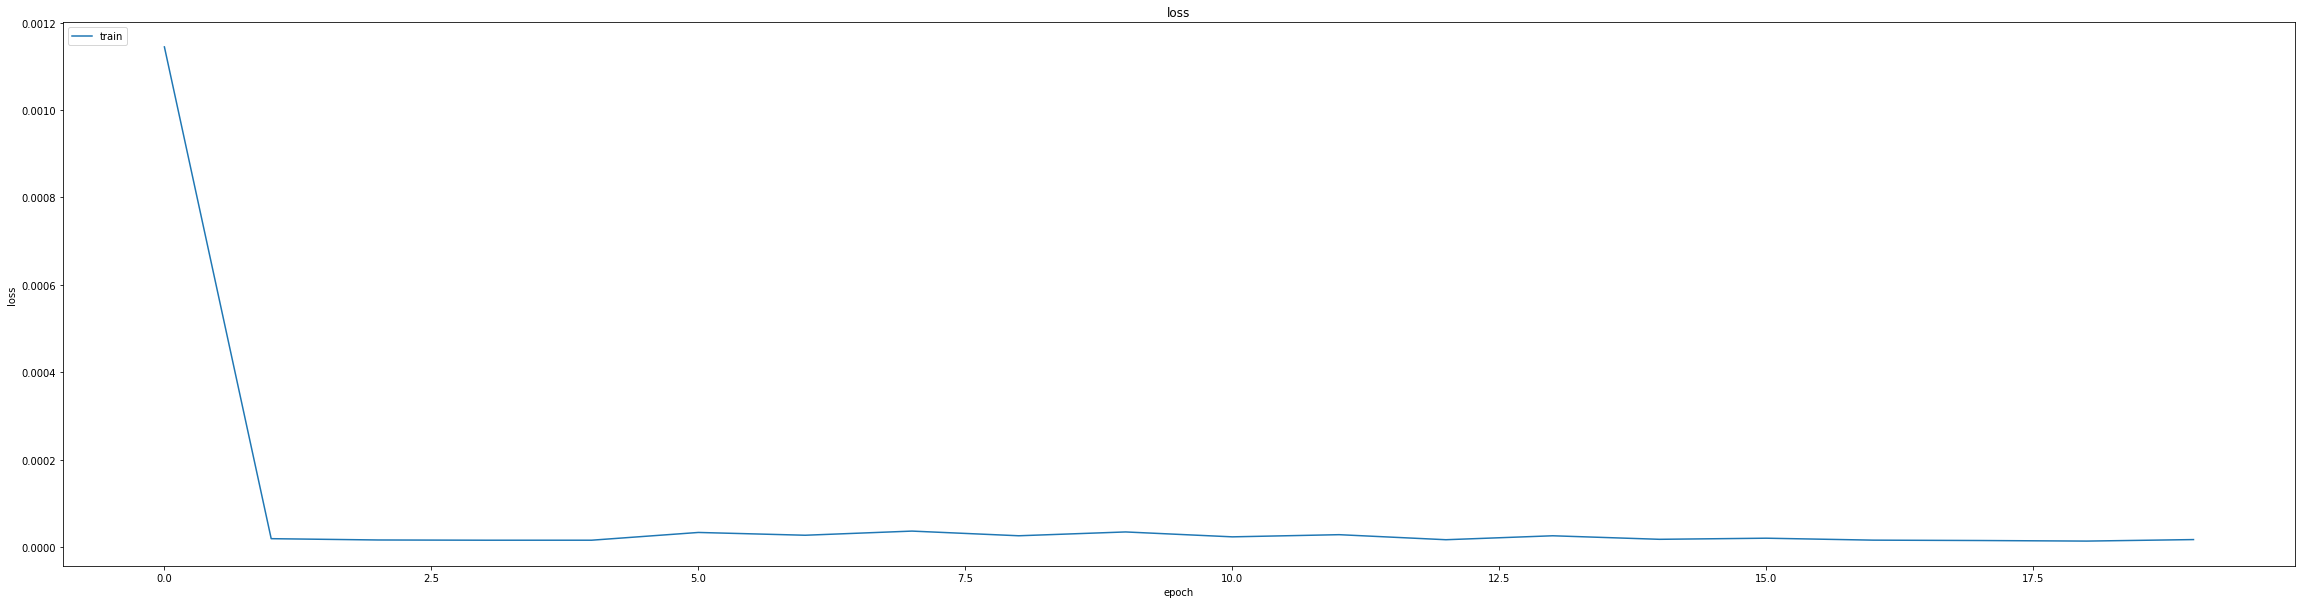

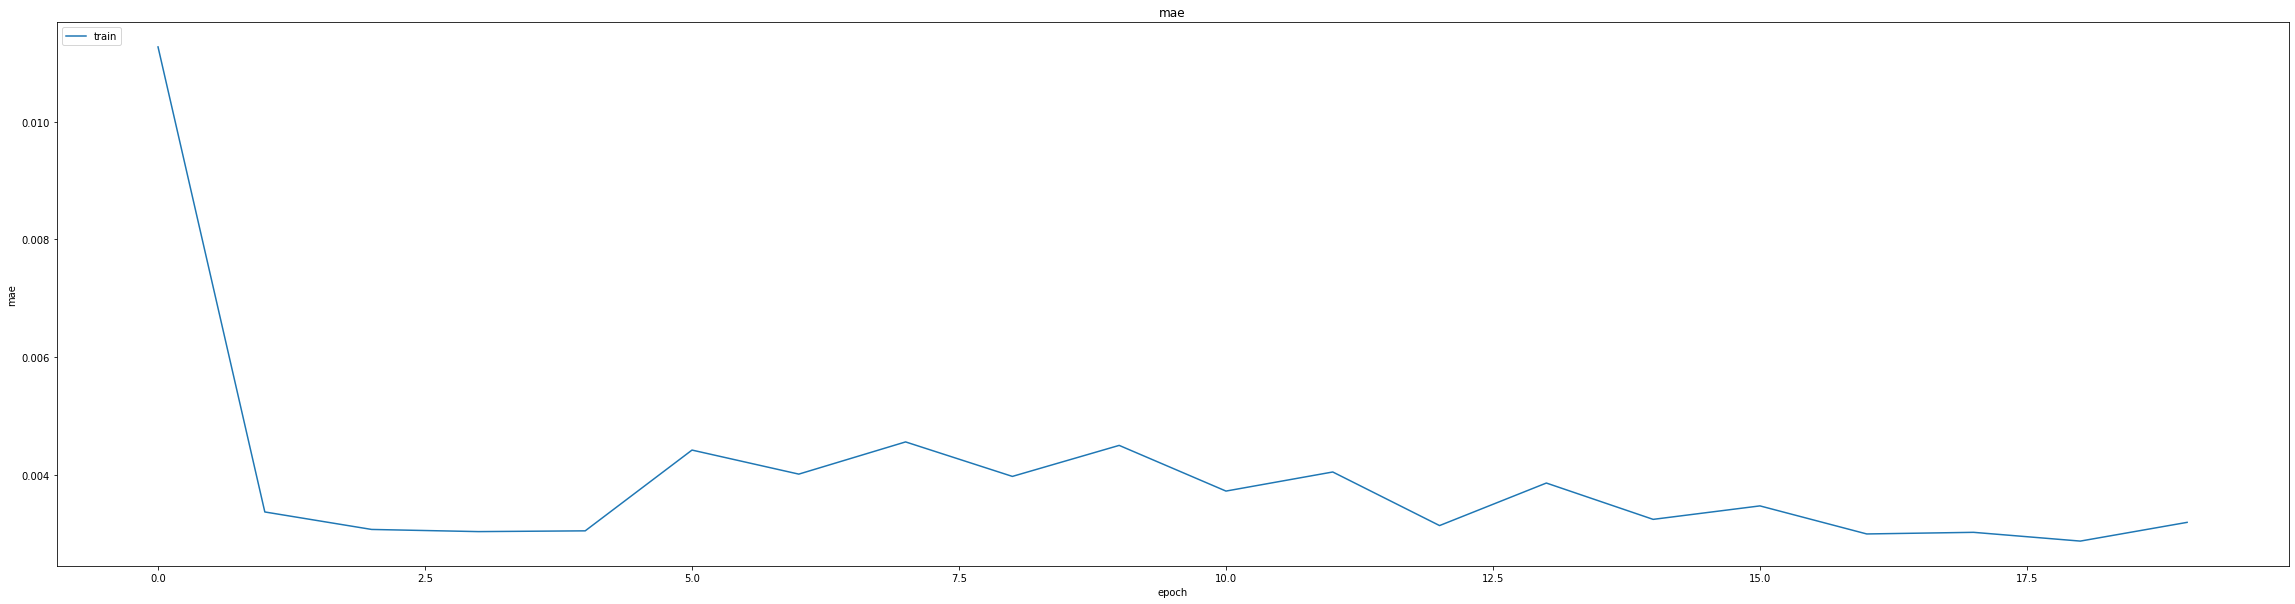

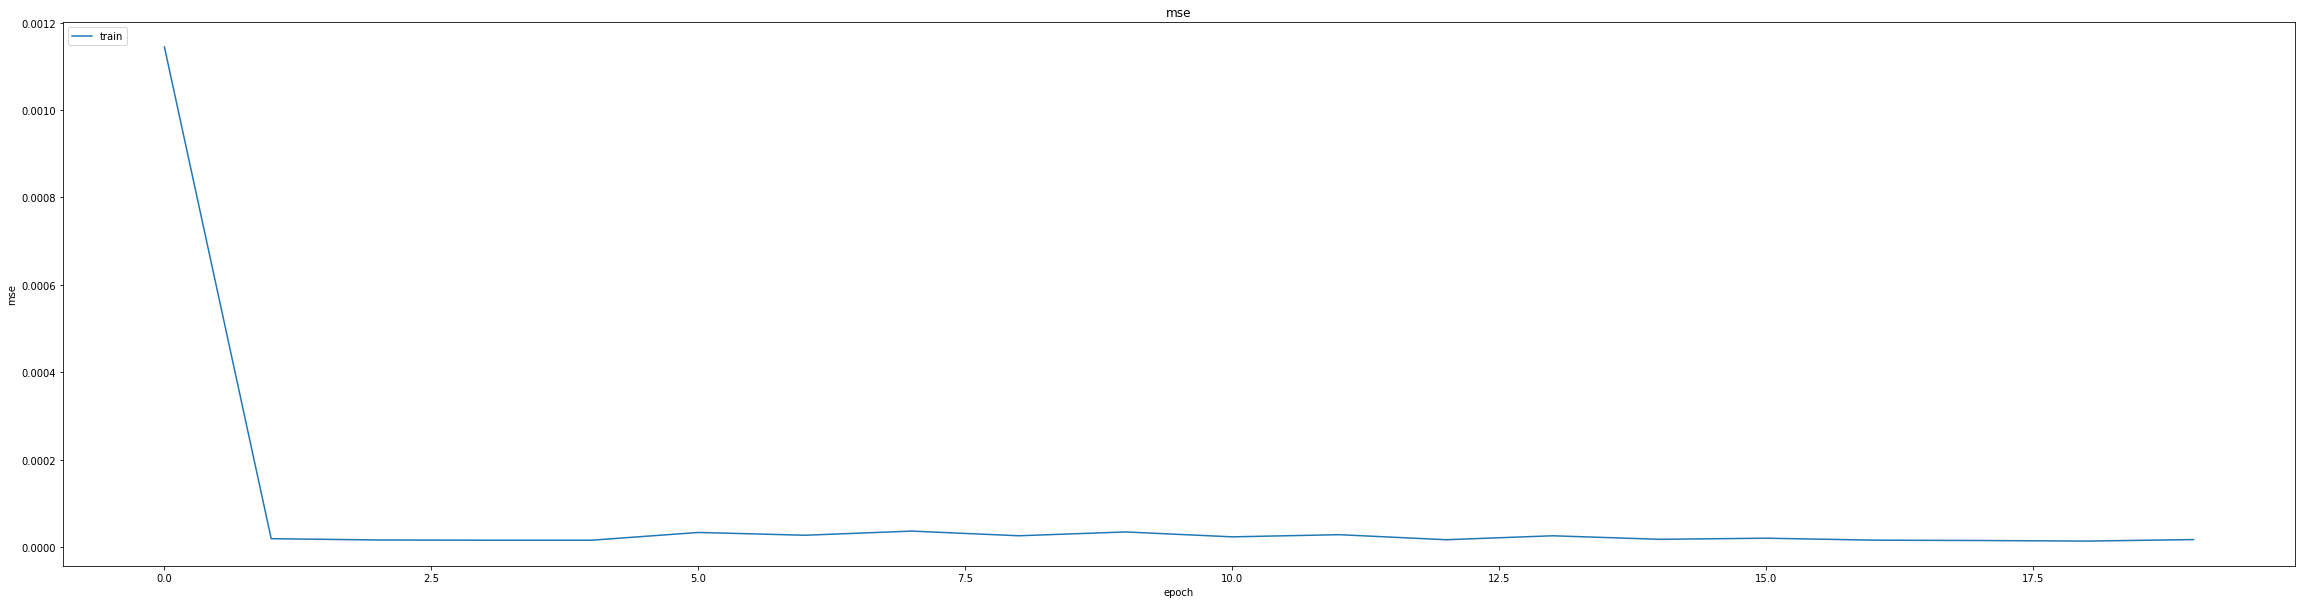

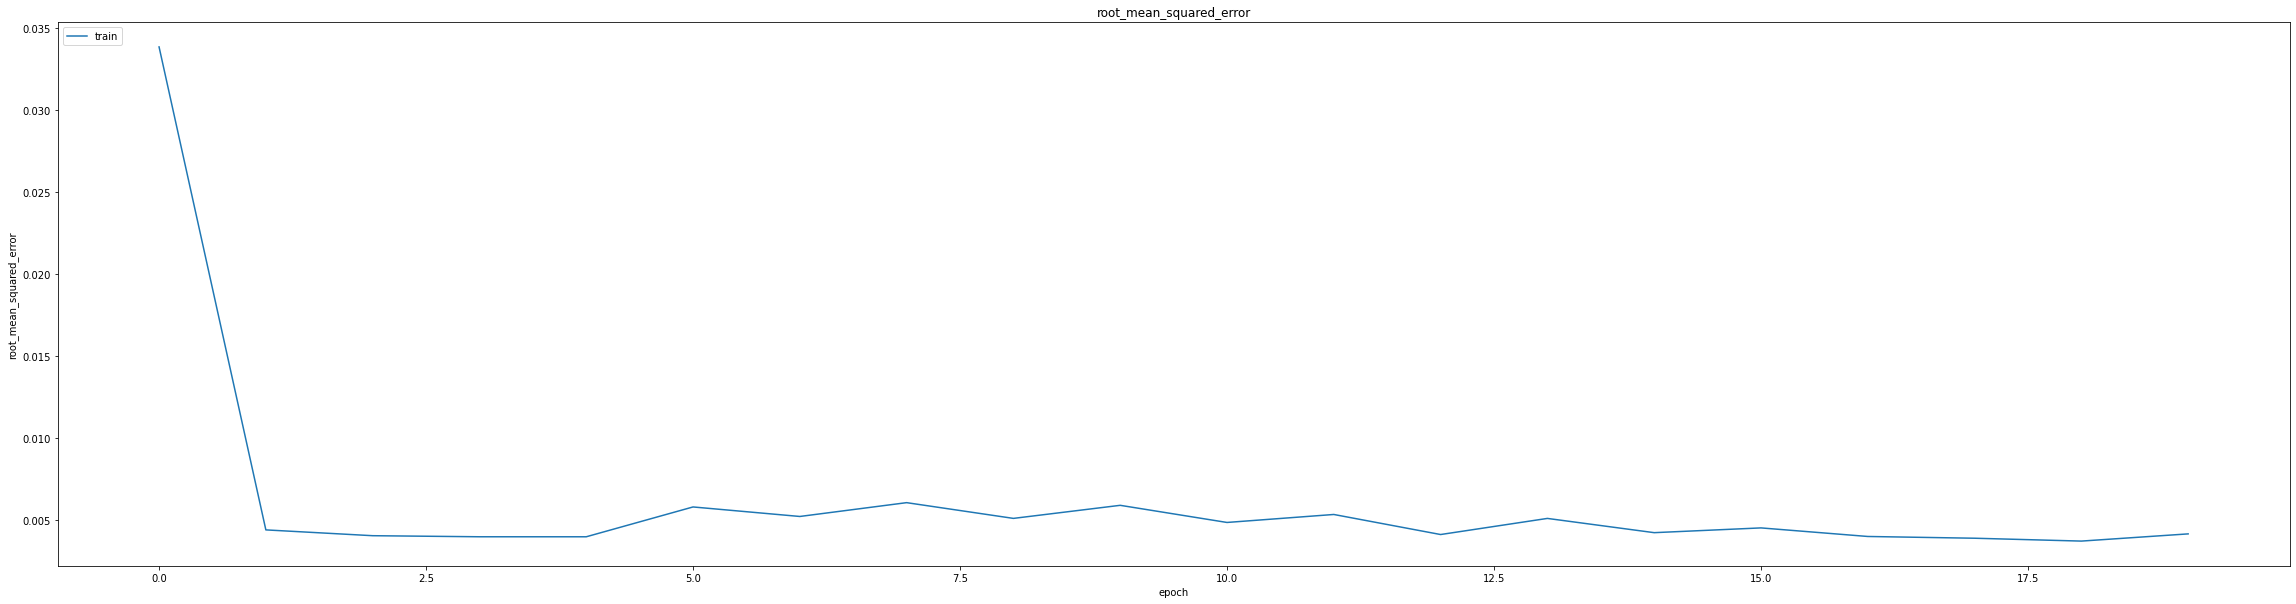

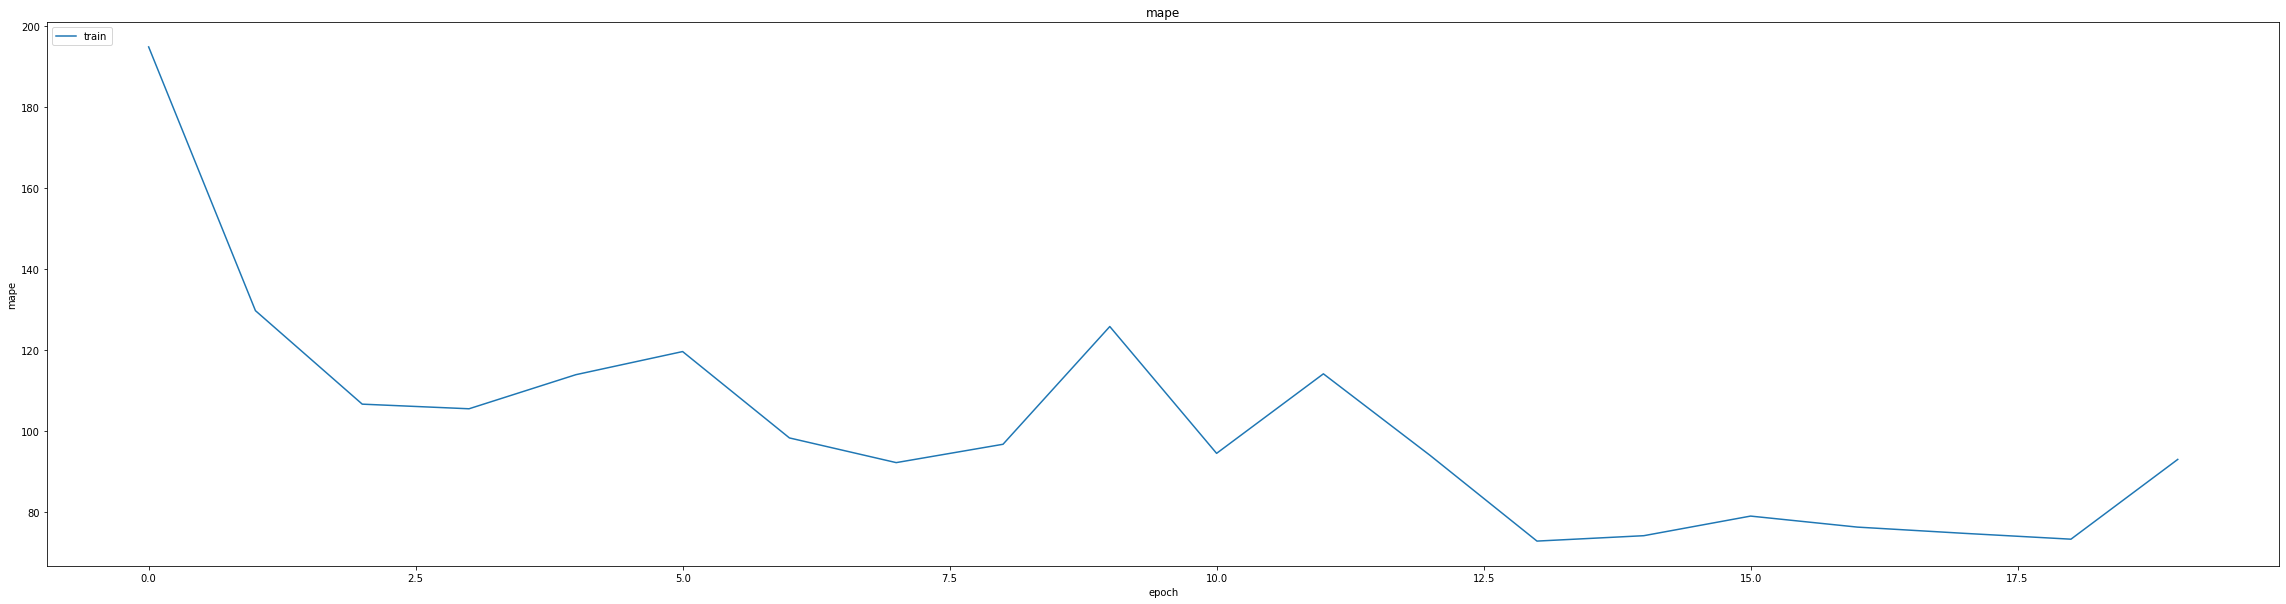

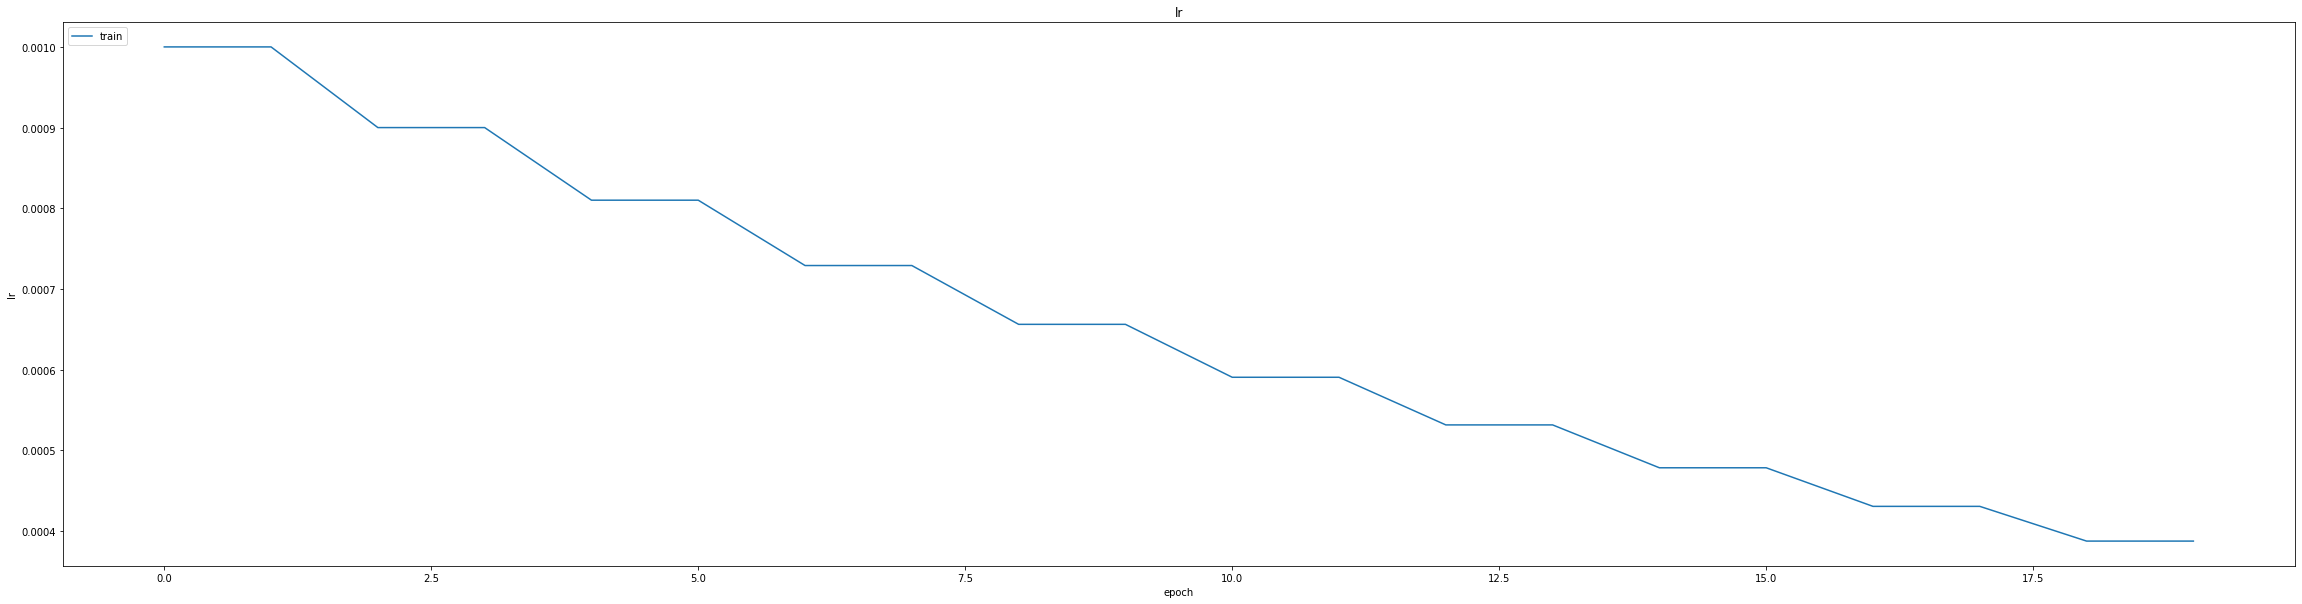

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005719479639083147
0.008201248943805695
687/687 [==============================] - 24s 32ms/step
0.9985091218151008


687/687 [==============================] - 22s 32ms/step


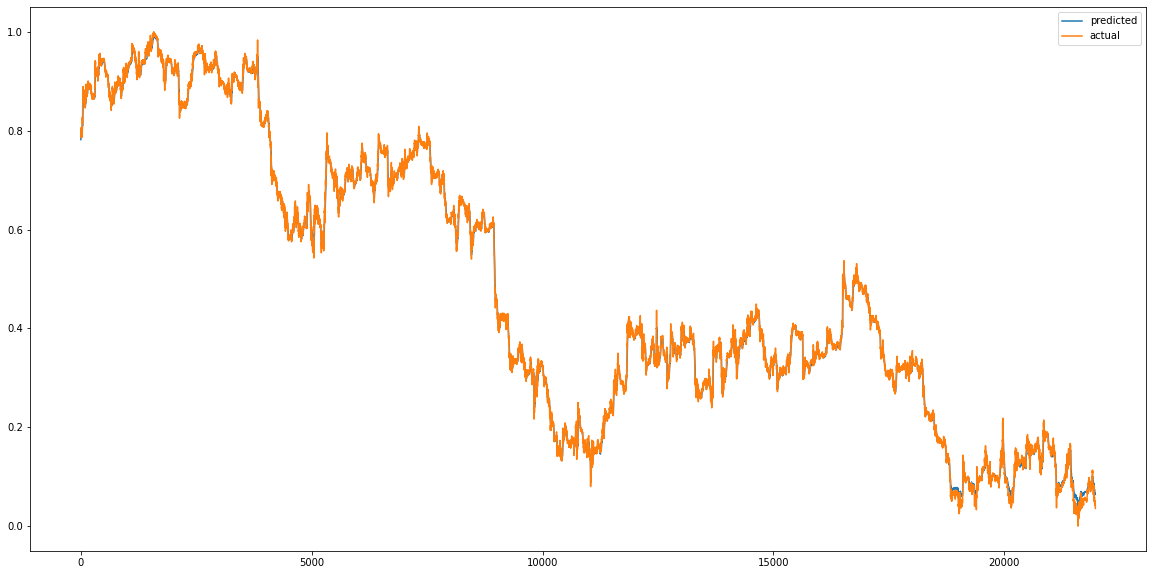

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


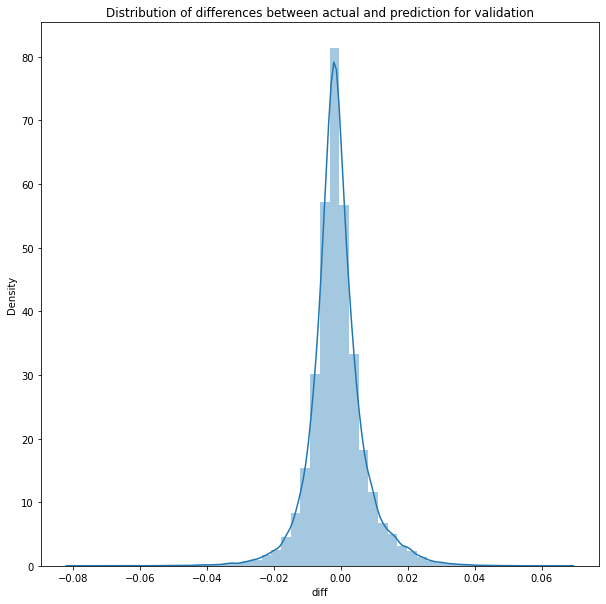

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

705/705 [==============================] - 30s 43ms/step


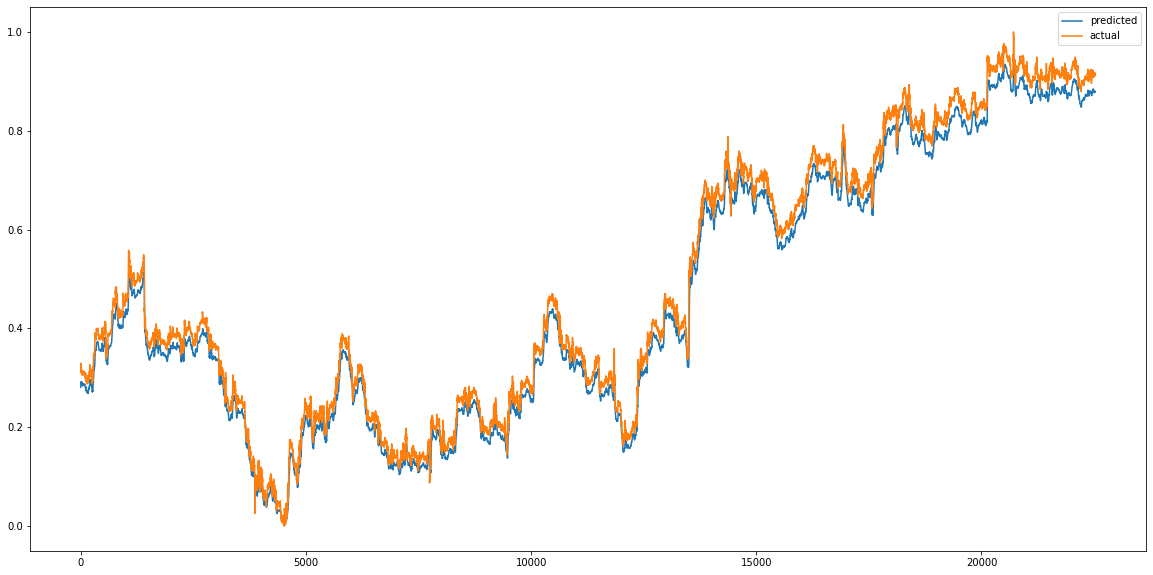

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


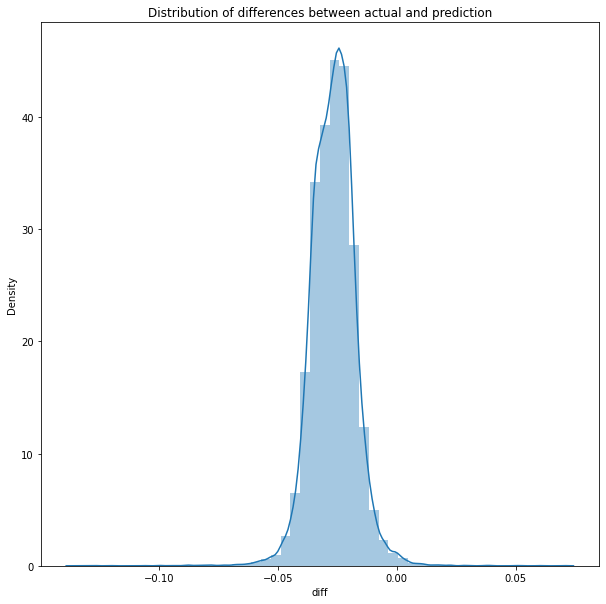

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


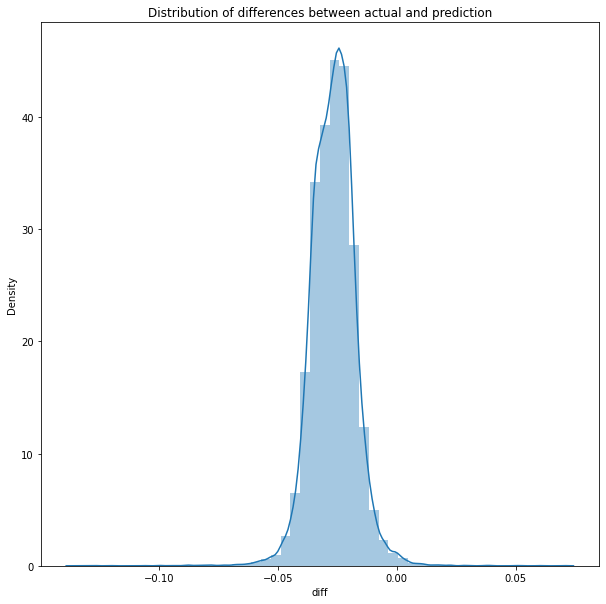

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008015661526234934
MAE :  0.026837473593014007
RMSE  : 0.028311943639098558
705/705 [==============================] - 26s 37ms/step
R2_Score  : 0.989011526581515


count    22530.000000
mean        -0.026734
std          0.009319
min         -0.135293
25%         -0.032684
50%         -0.026463
75%         -0.021020
max          0.070512
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 256.0610 - mae: 1.9663 - mse: 256.0610 - root_mean_squared_error: 16.0019 - mape: 2126.6970
Epoch 1: val_mse improved from inf to 0.00809, saving model to weights.best.hdf5
463/463 [==============================] - 252s 534ms/step - loss: 256.0610 - mae: 1.9663 - mse: 256.0610 - root_mean_squared_error: 16.0019 - mape: 2126.6970 - val_loss: 0.0081 - val_mae: 0.0608 - val_mse: 0.0081 - val_root_mean_squared_error: 0.0900 - val_mape: 12936.7705
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0277 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 1388.2537
Epoch 2: val_mse improved from 0.00809 to 0.00348, saving model to weights.best.hdf5
463/463 [==============================] - 253s 547ms/step - loss: 0.0018 - mae: 0.0277 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 1388.2537 - val_loss: 0.0035 - val_mae: 0.0346 - val_mse: 0.0035 - val_root_mean_squared_error: 

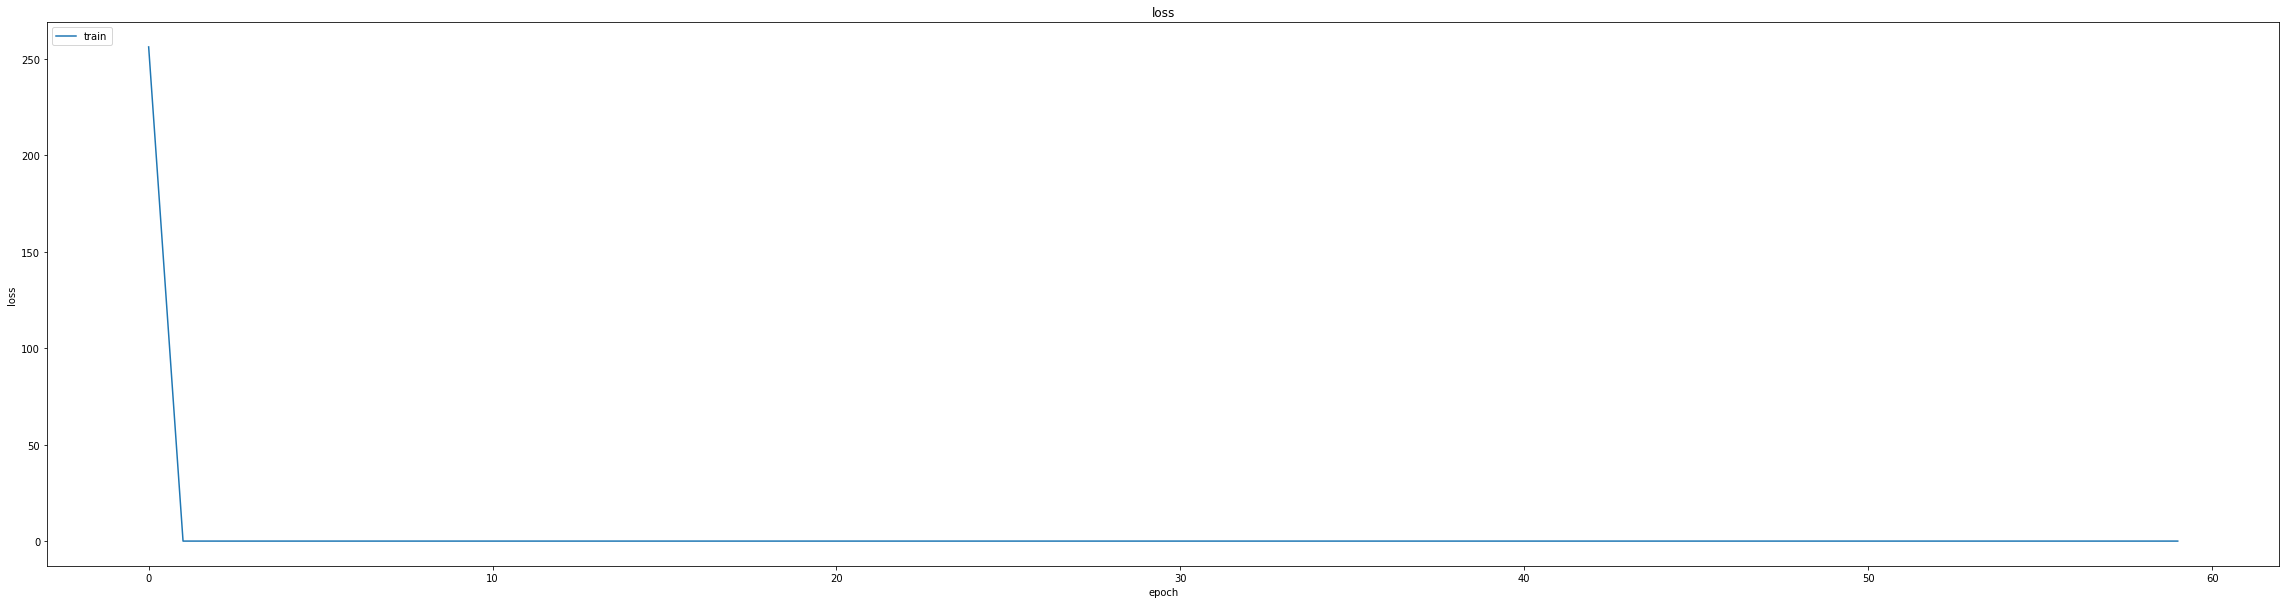

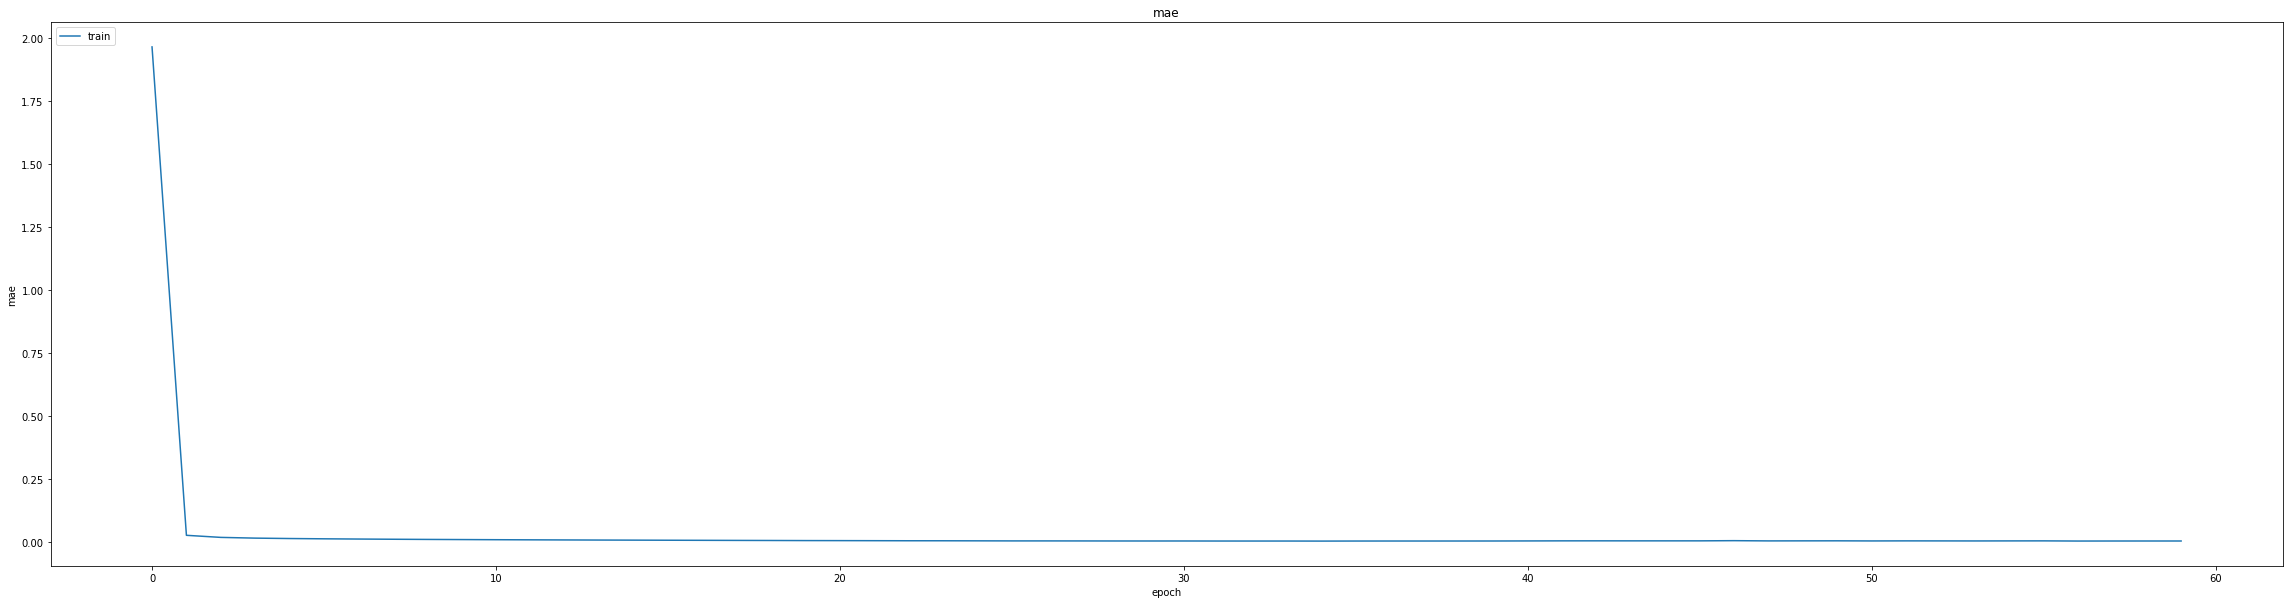

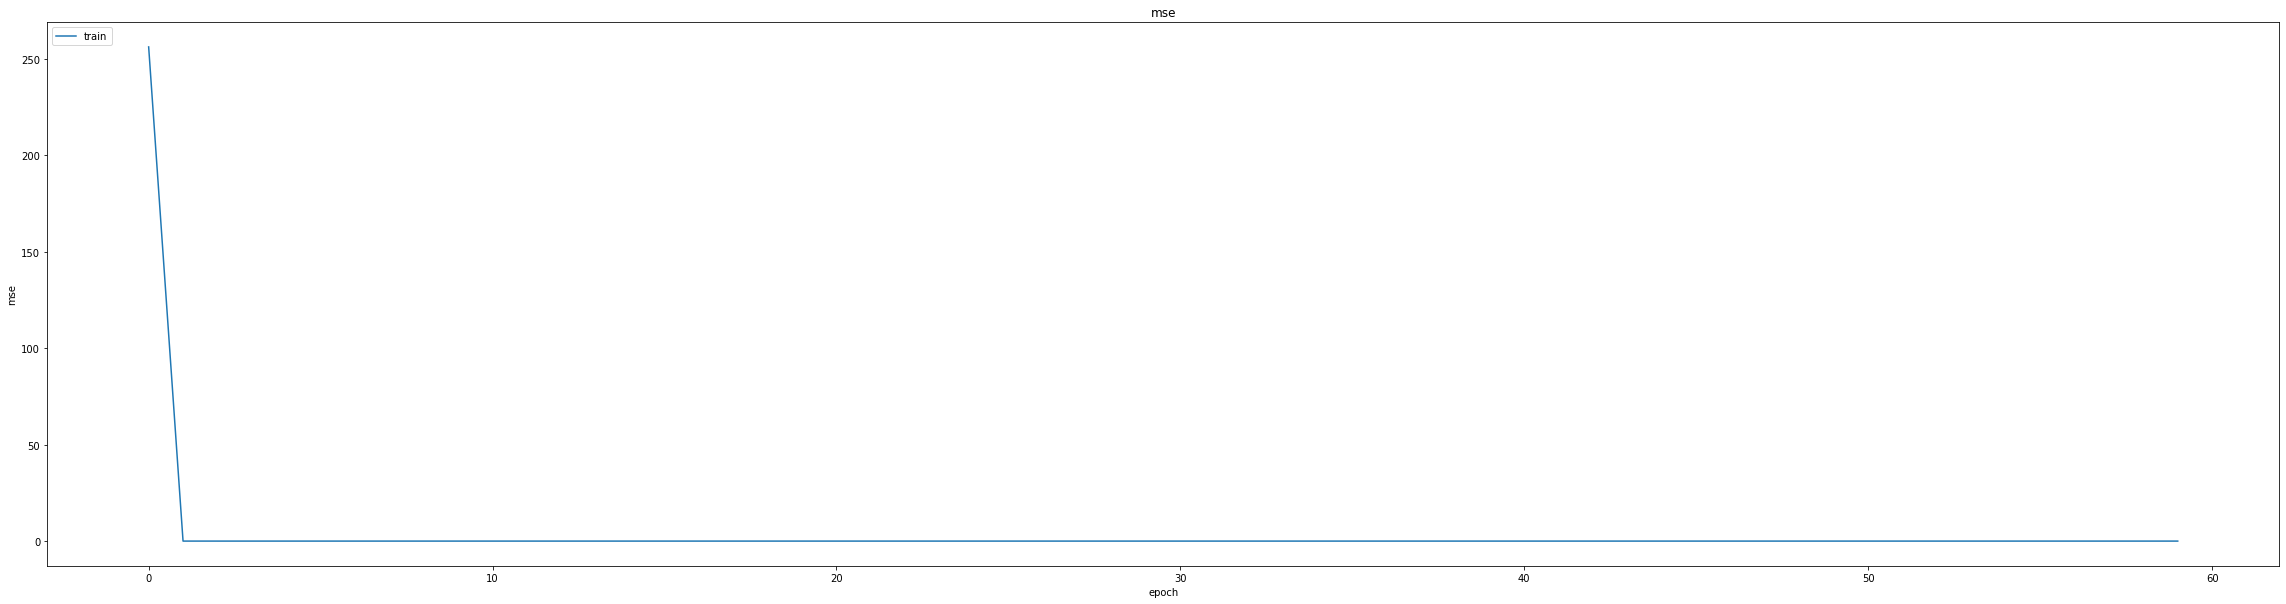

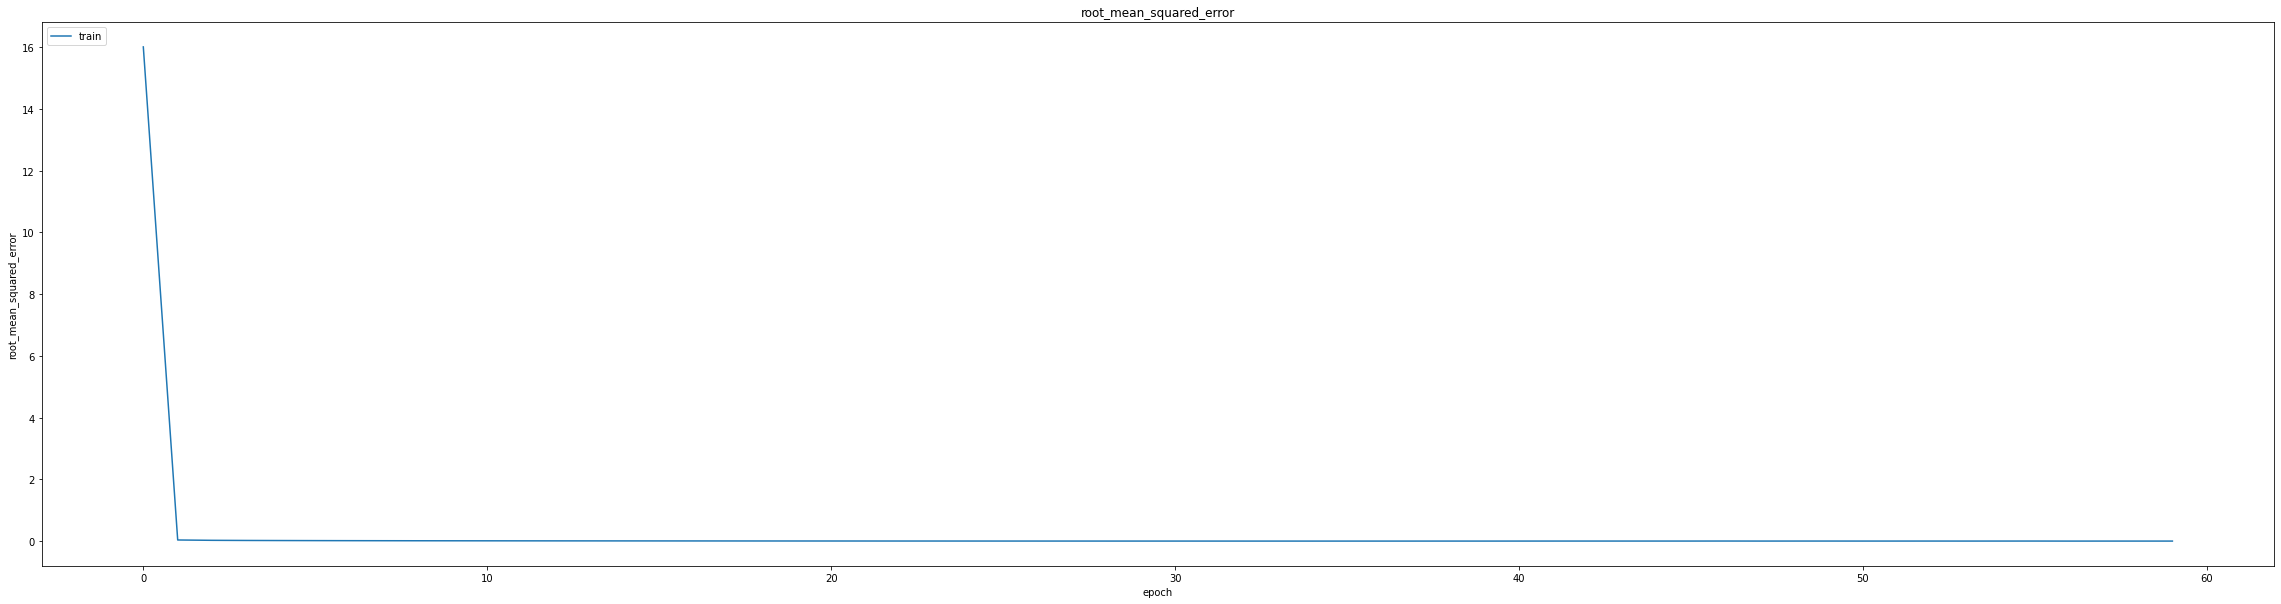

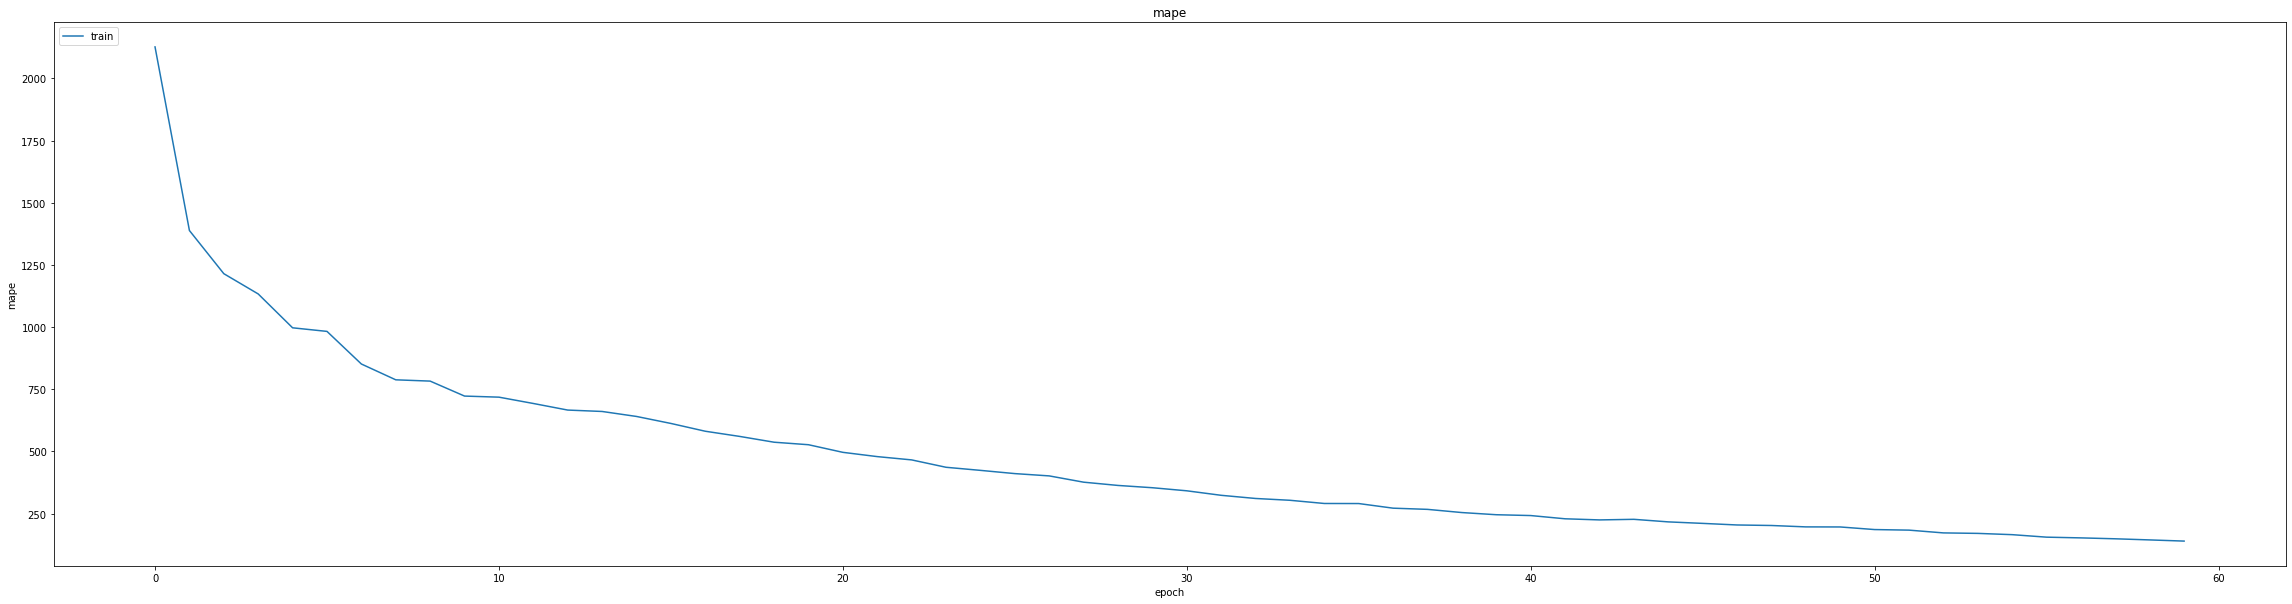

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007532991003245115
0.010753440670669079
687/687 [==============================] - 20s 27ms/step
0.9985497709506992


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 6.3148e-04 - mae: 0.0085 - mse: 6.3148e-04 - root_mean_squared_error: 0.0251 - mape: 154.4410
Epoch 1: val_mse did not improve from 0.00012
463/463 [==============================] - 254s 540ms/step - loss: 6.3148e-04 - mae: 0.0085 - mse: 6.3148e-04 - root_mean_squared_error: 0.0251 - mape: 154.4410 - val_loss: 1.3879e-04 - val_mae: 0.0088 - val_mse: 1.3879e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1149.5782 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.3147e-05 - mae: 0.0027 - mse: 1.3147e-05 - root_mean_squared_error: 0.0036 - mape: 134.1131
Epoch 2: val_mse did not improve from 0.00012
463/463 [==============================] - 251s 541ms/step - loss: 1.3147e-05 - mae: 0.0027 - mse: 1.3147e-05 - root_mean_squared_error: 0.0036 - mape: 134.1131 - val_loss: 1.5081e-04 - val_mae: 0.0095 - val_mse: 1.5081e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1019.7845

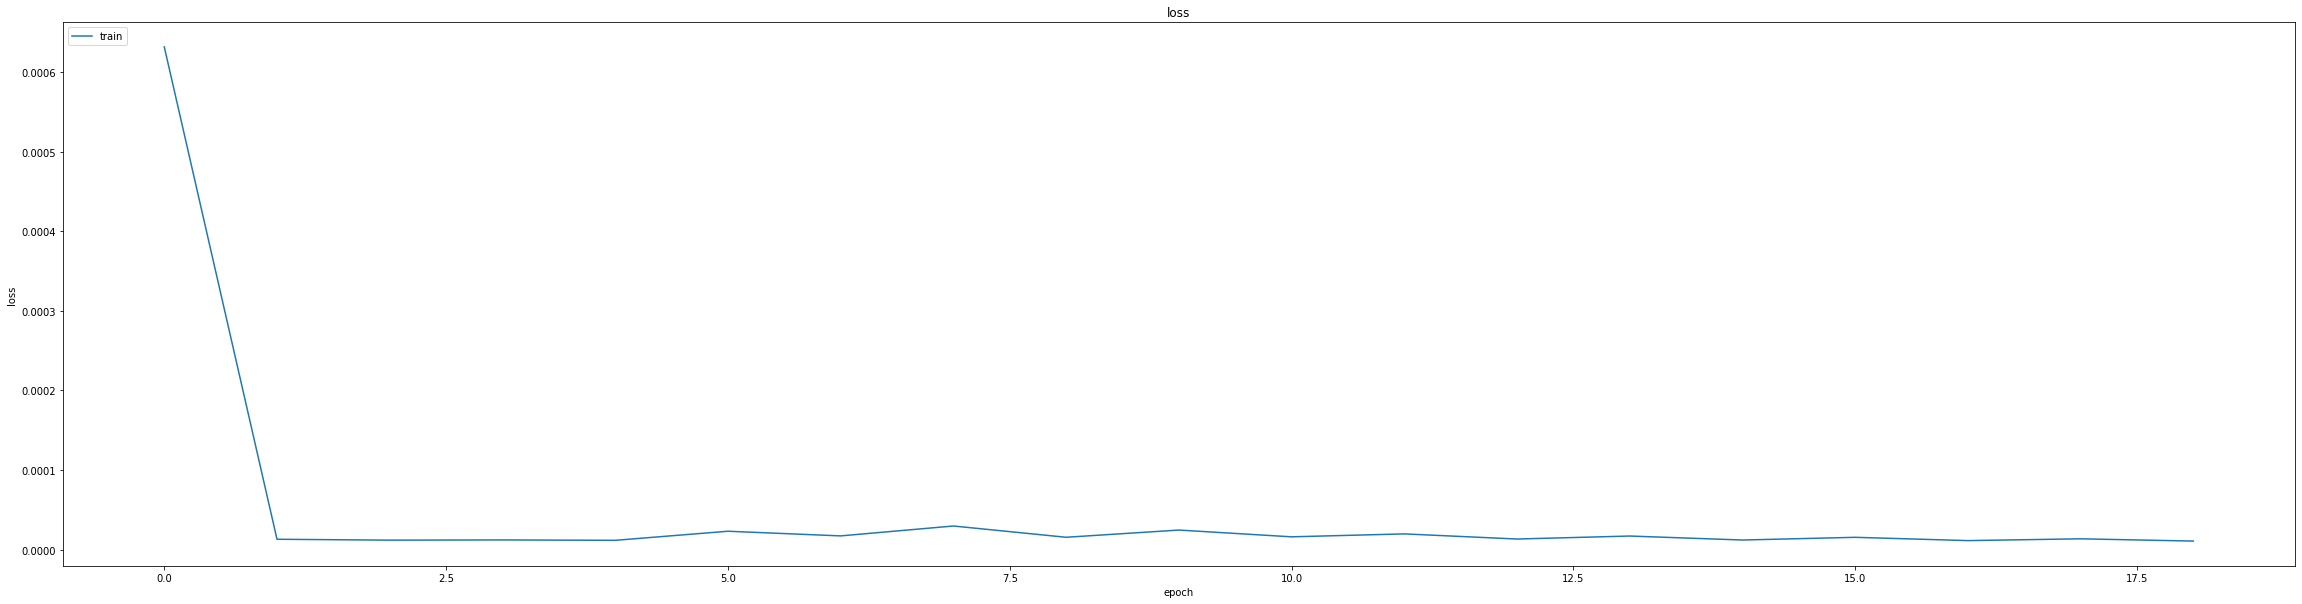

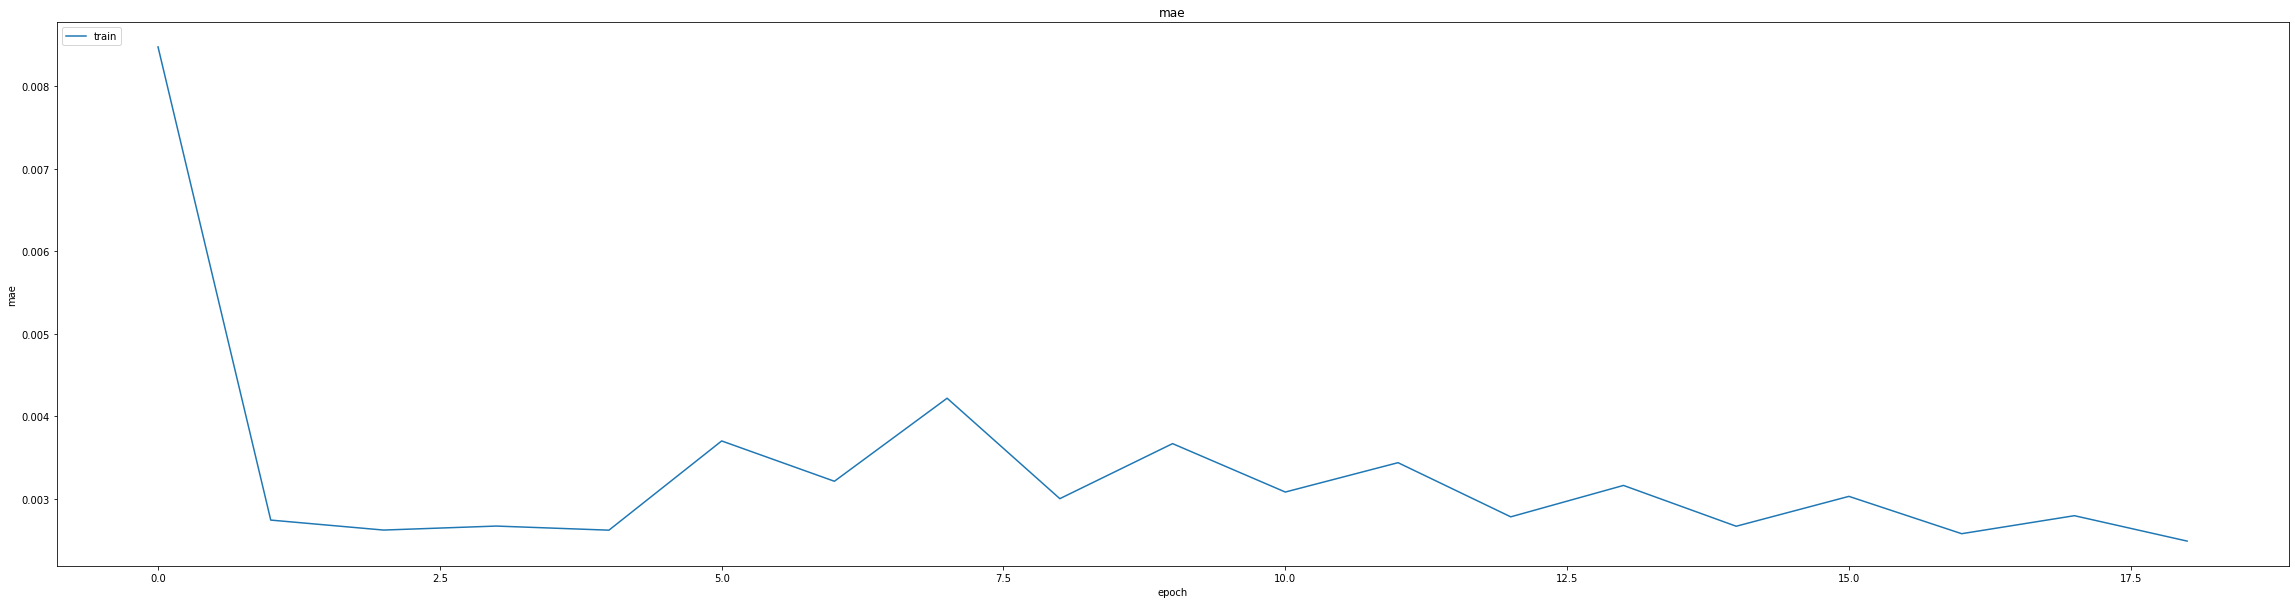

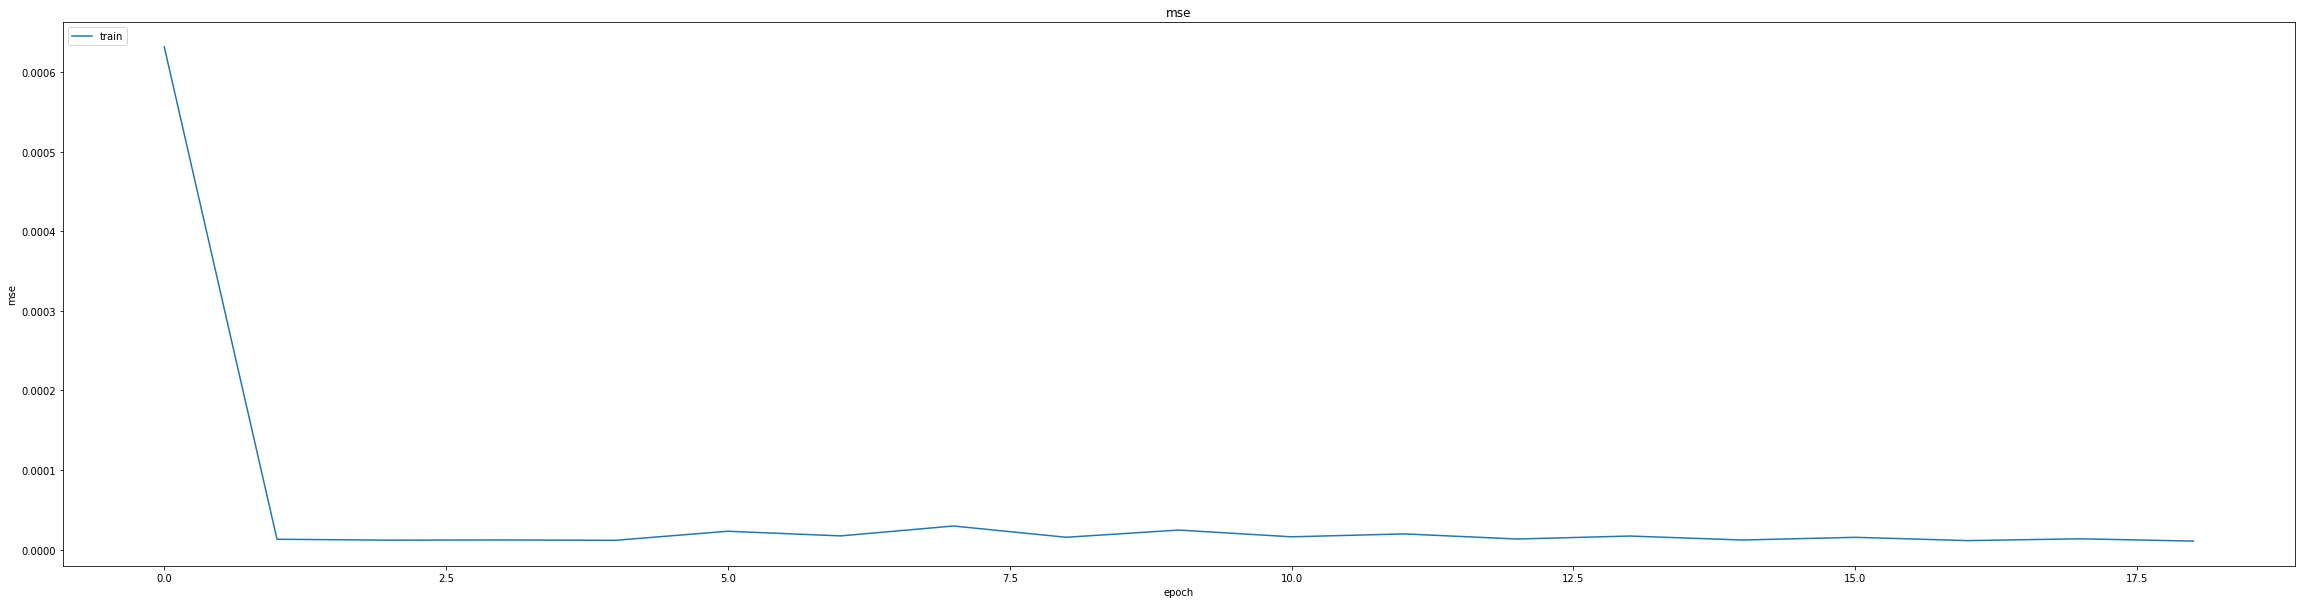

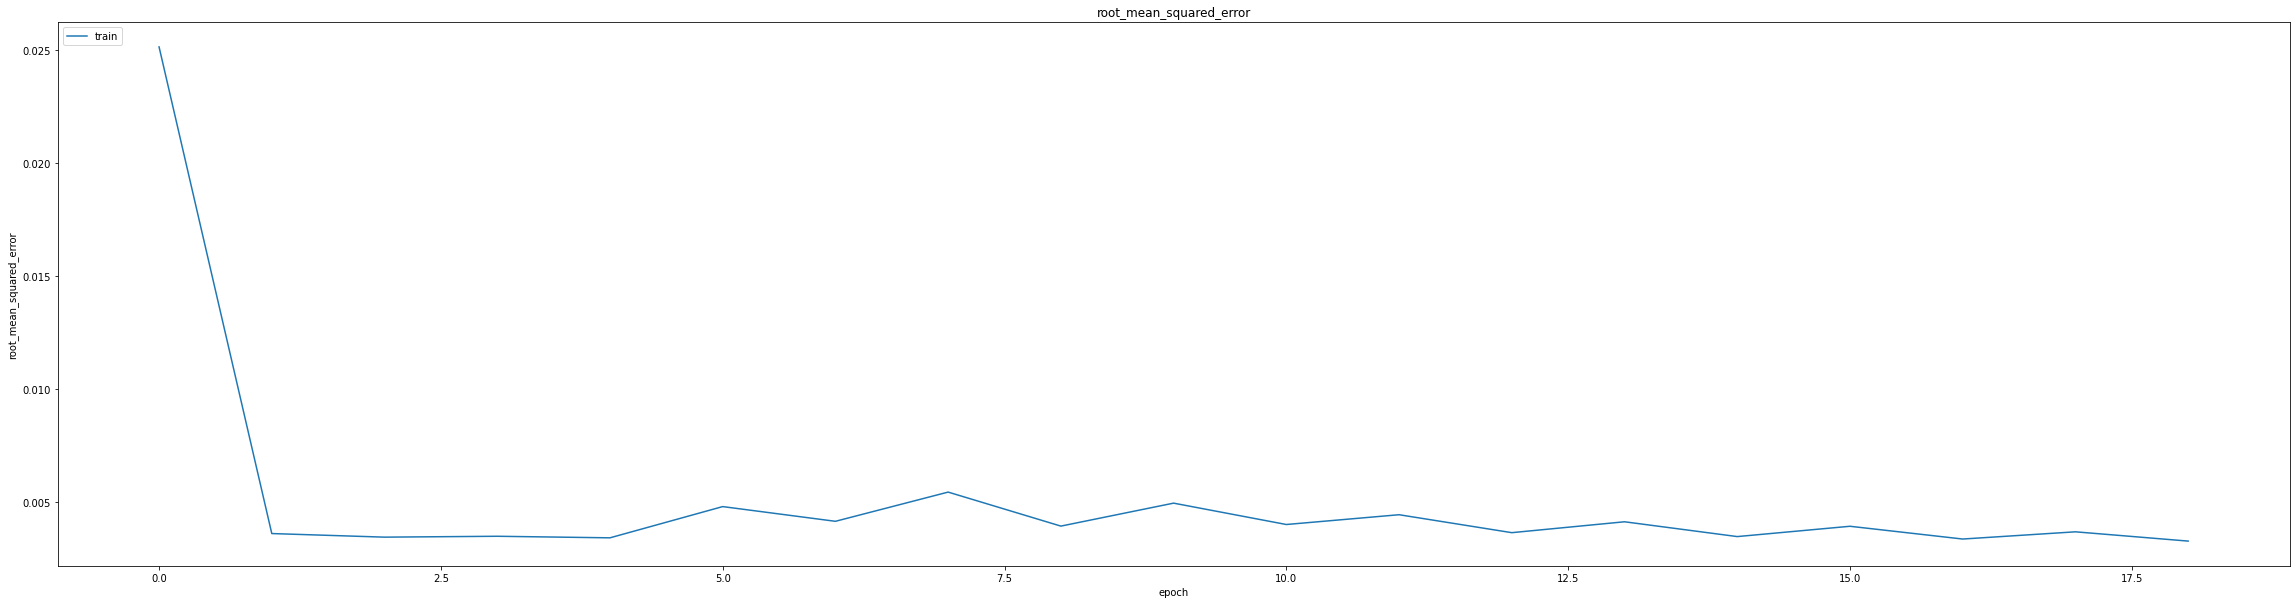

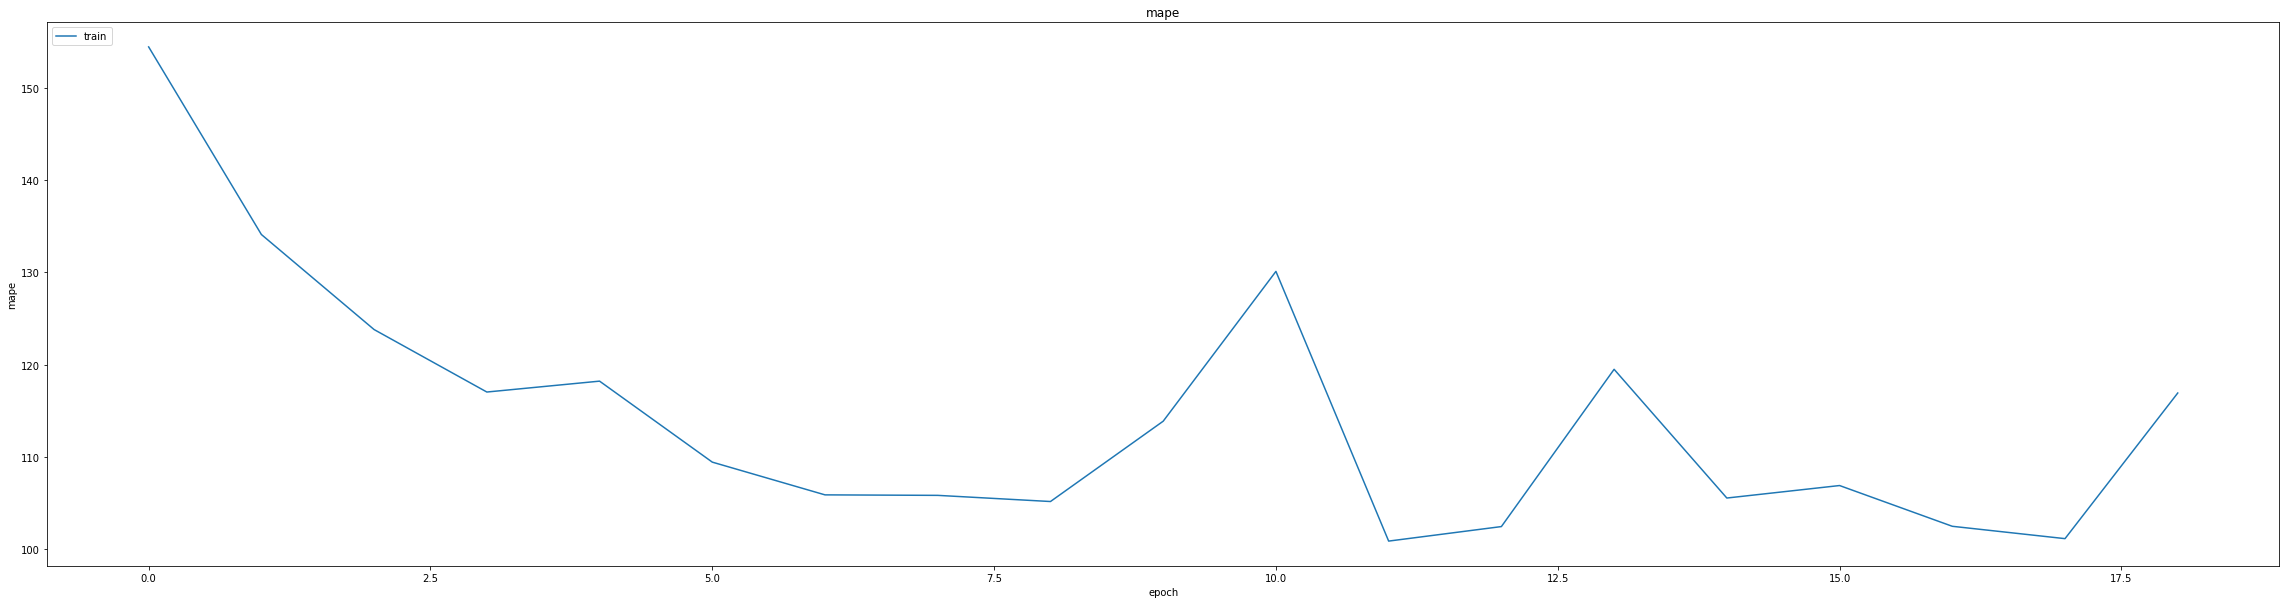

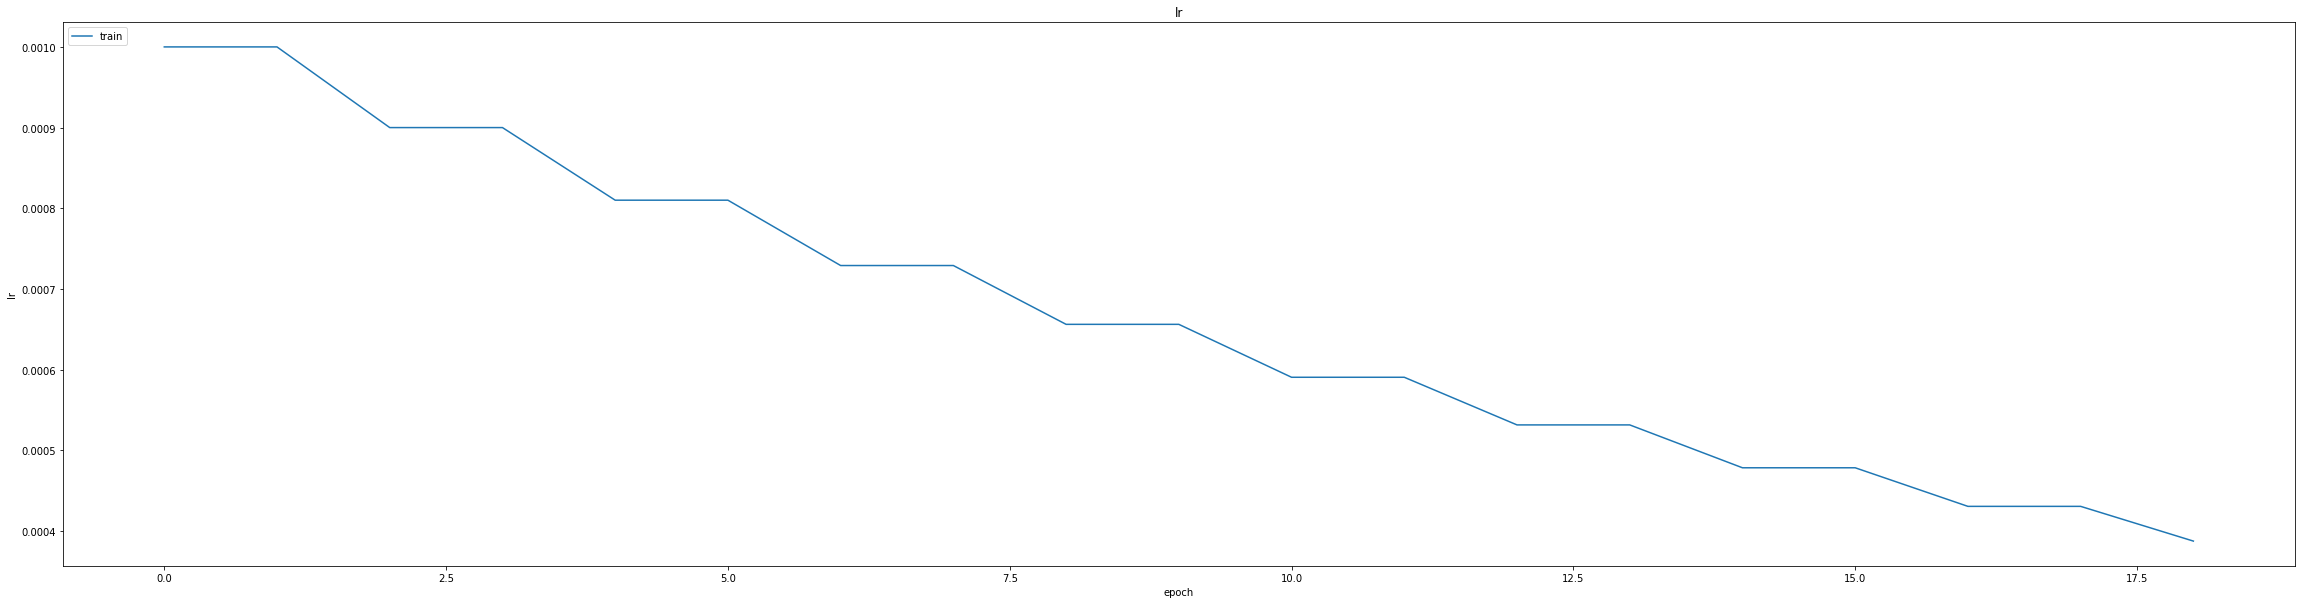

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006948687136173248
0.010154473595321178
687/687 [==============================] - 20s 26ms/step
0.9986876127852707


687/687 [==============================] - 18s 27ms/step


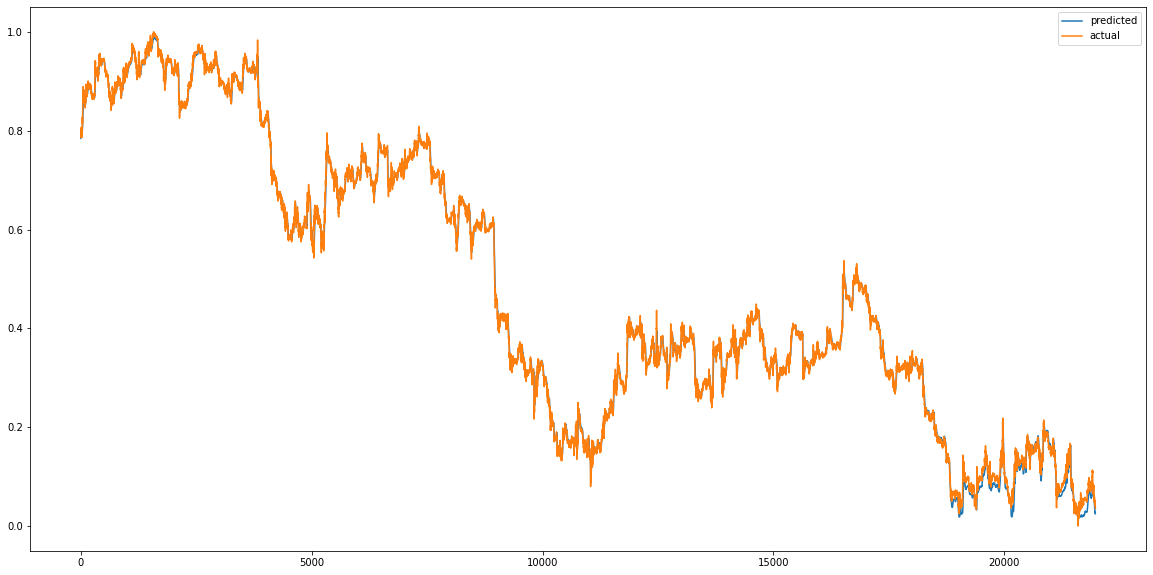

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


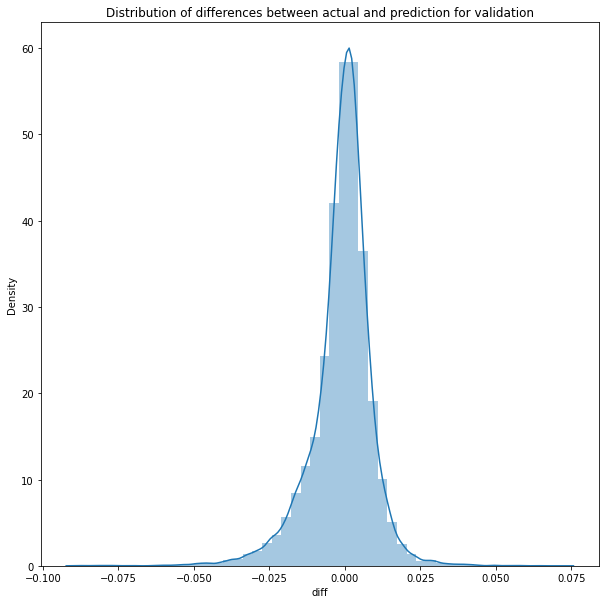

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

705/705 [==============================] - 19s 27ms/step


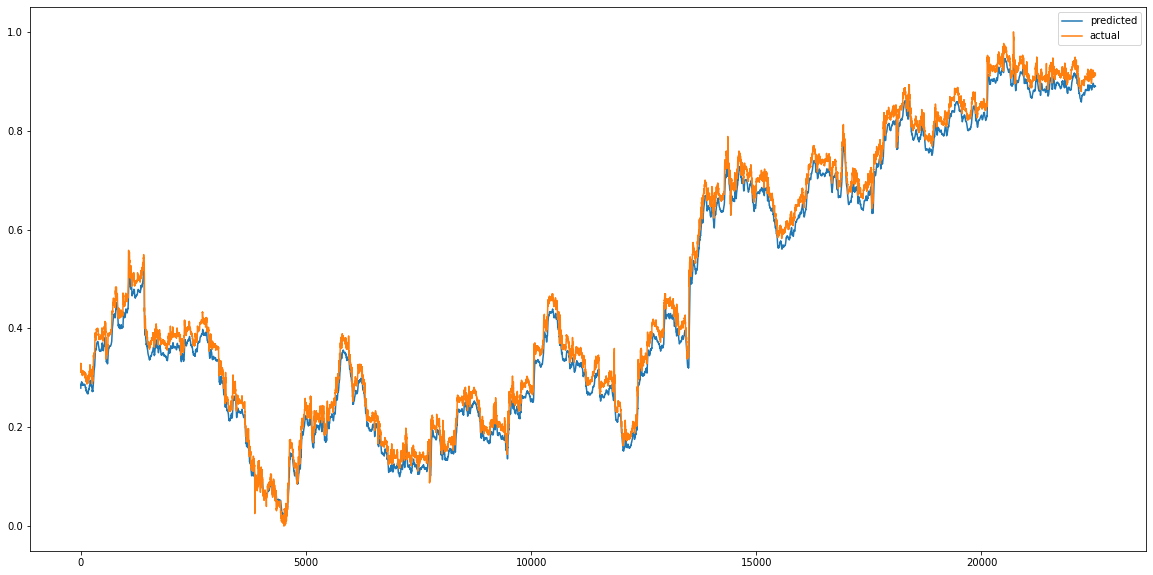

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


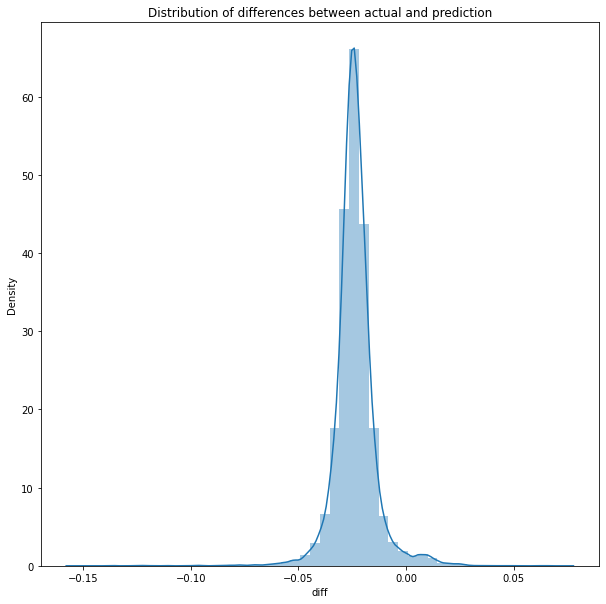

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0006572795942595577
MAE :  0.024184649173439845
RMSE  : 0.025637464661302952
705/705 [==============================] - 19s 27ms/step
R2_Score  : 0.9909895155571378


count    22530.000000
mean        -0.023714
std          0.009743
min         -0.153849
25%         -0.028064
50%         -0.024147
75%         -0.019817
max          0.073771
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 162.9516 - mae: 1.4000 - mse: 162.9516 - root_mean_squared_error: 12.7652 - mape: 1767.5646
Epoch 1: val_mse improved from inf to 0.00565, saving model to weights.best.hdf5
463/463 [==============================] - 297s 632ms/step - loss: 162.9516 - mae: 1.4000 - mse: 162.9516 - root_mean_squared_error: 12.7652 - mape: 1767.5646 - val_loss: 0.0056 - val_mae: 0.0576 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0752 - val_mape: 9747.6211
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0456 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 981.1271
Epoch 2: val_mse improved from 0.00565 to 0.00220, saving model to weights.best.hdf5
463/463 [==============================] - 283s 611ms/step - loss: 0.0034 - mae: 0.0456 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 981.1271 - val_loss: 0.0022 - val_mae: 0.0290 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0

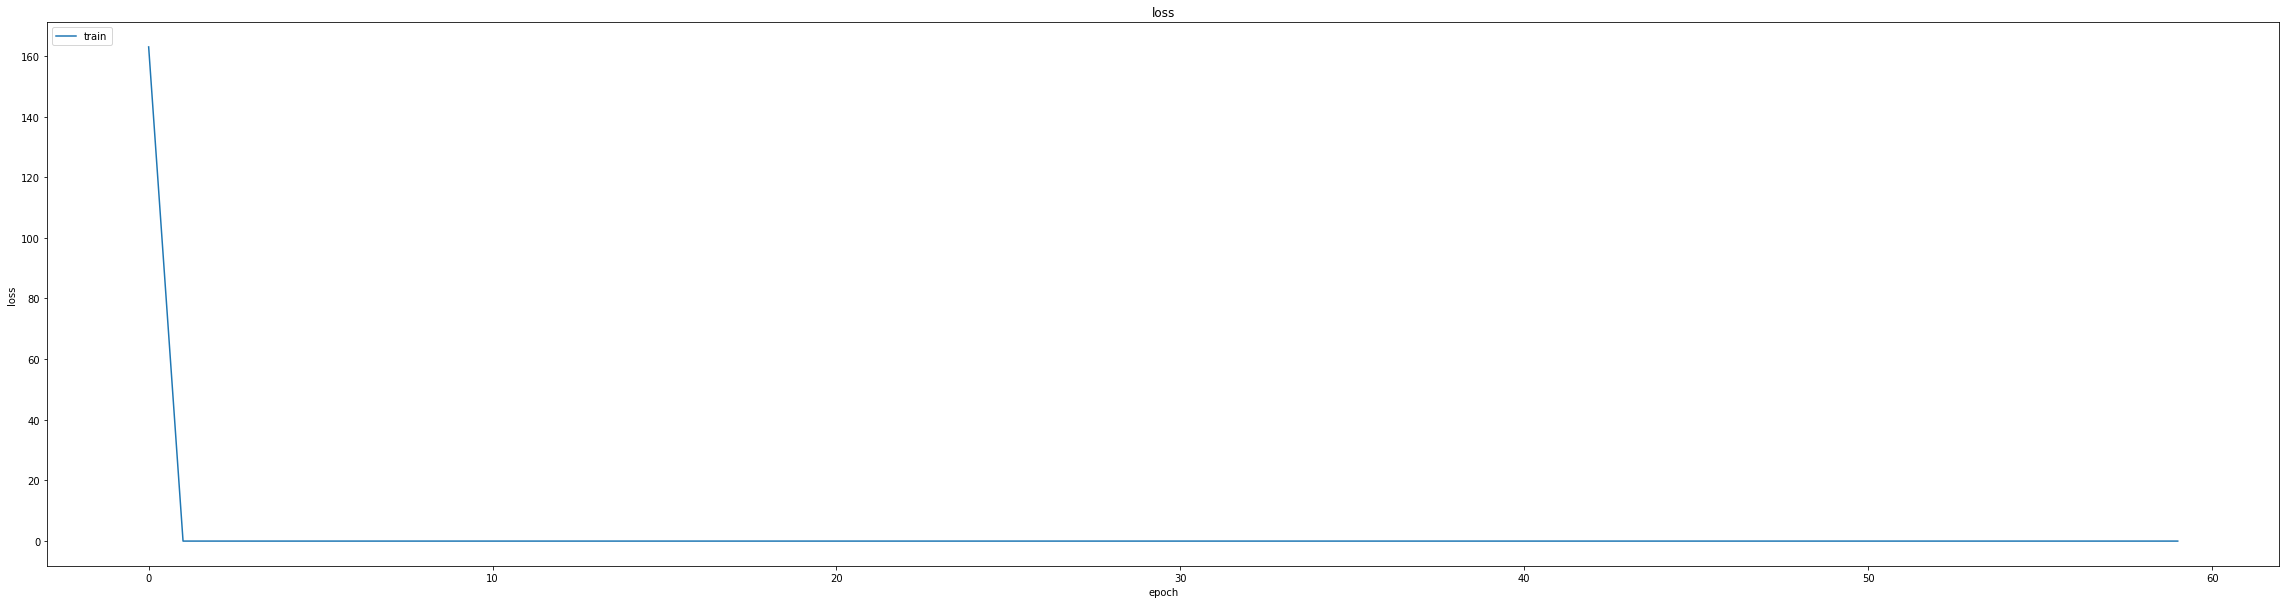

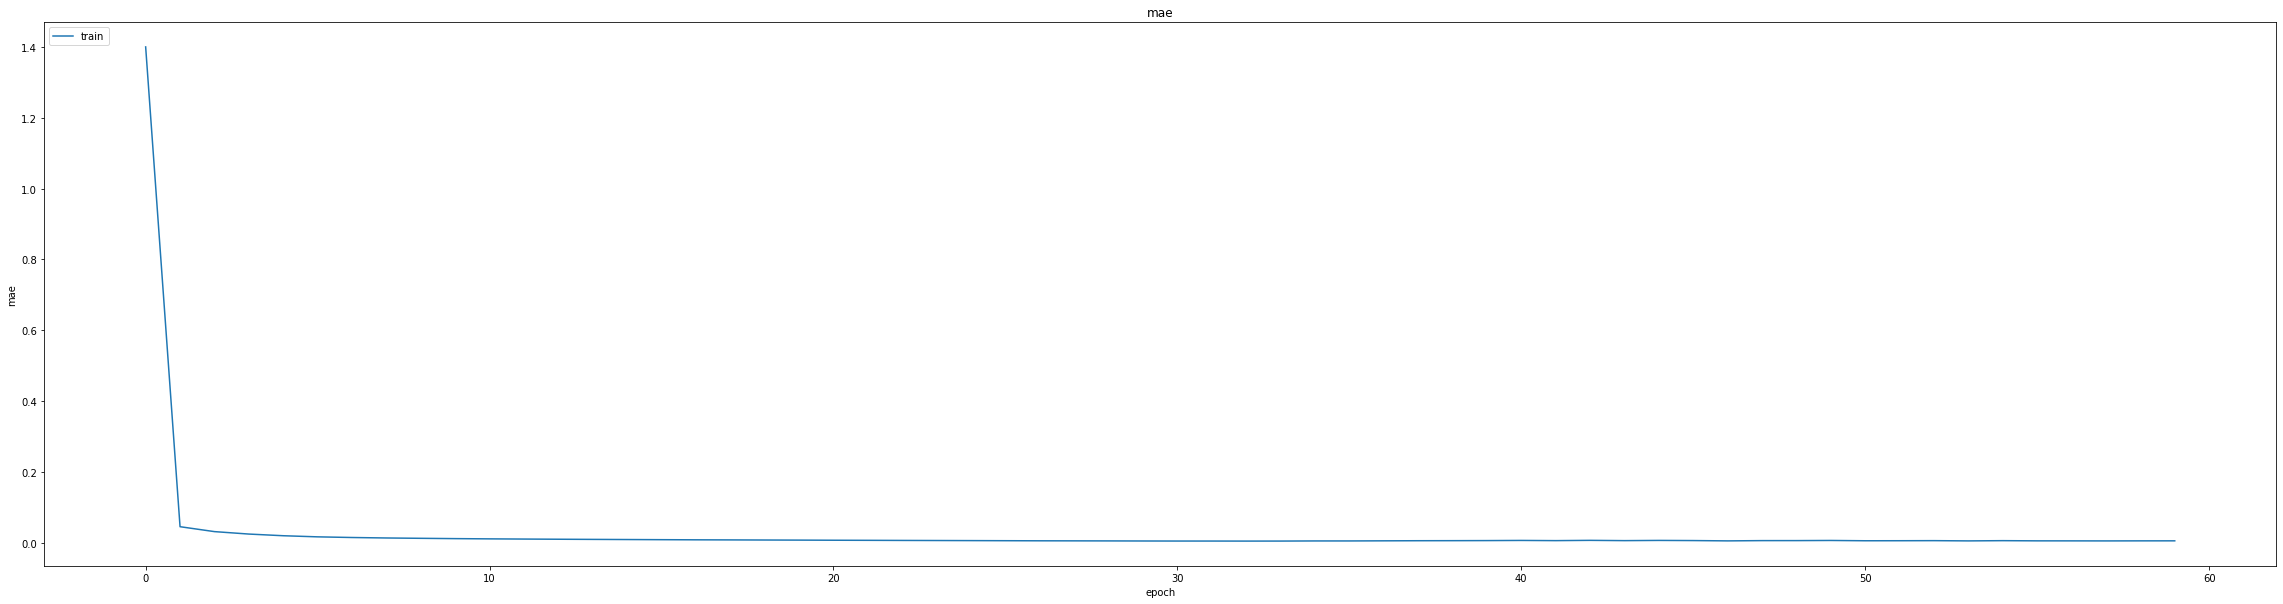

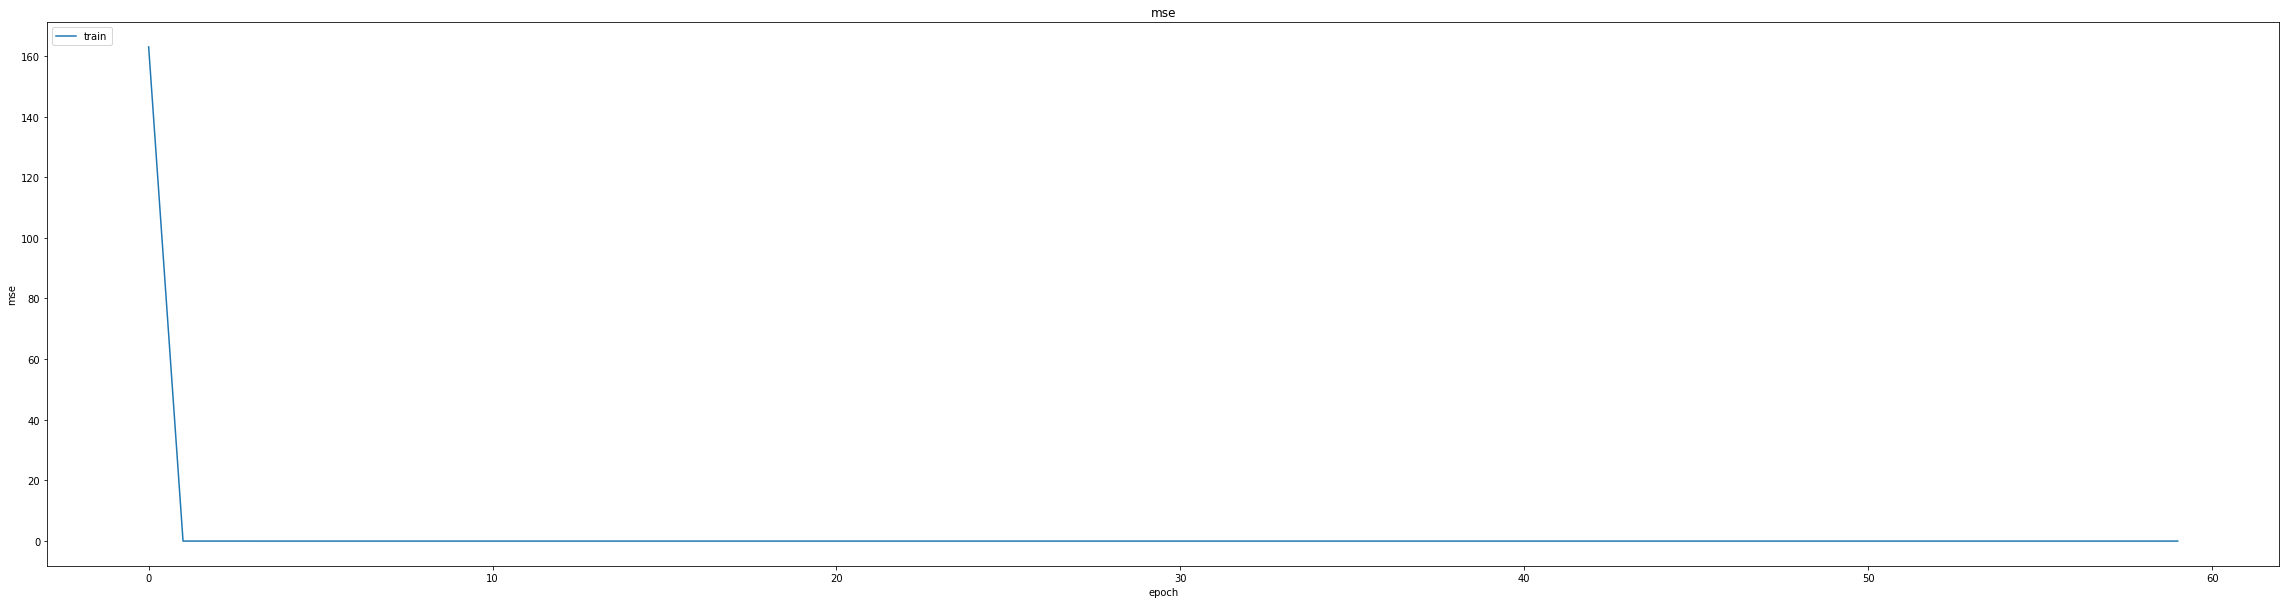

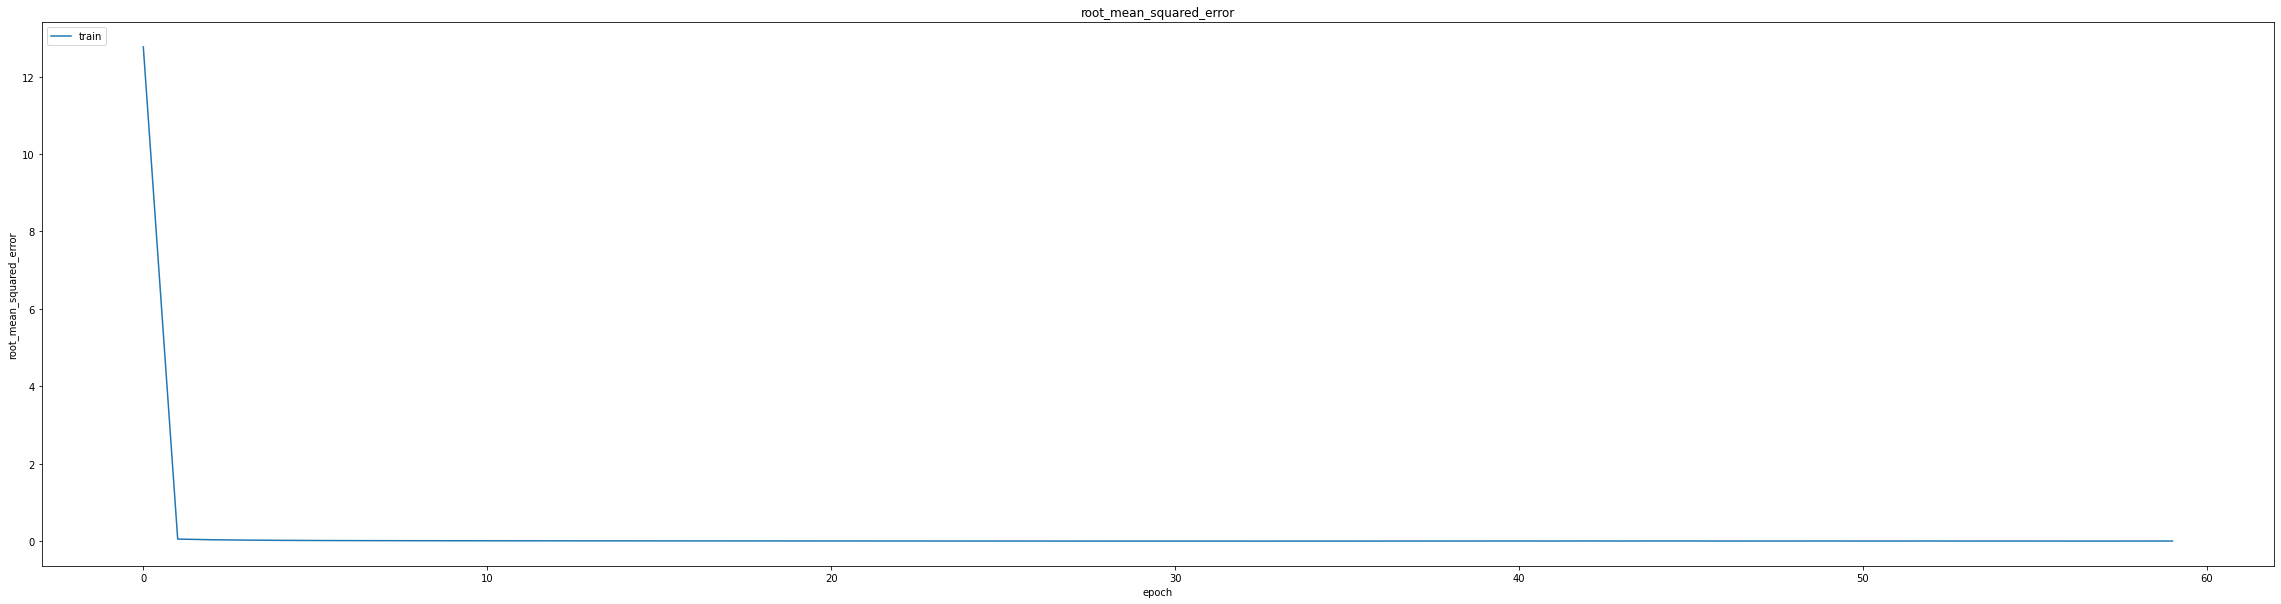

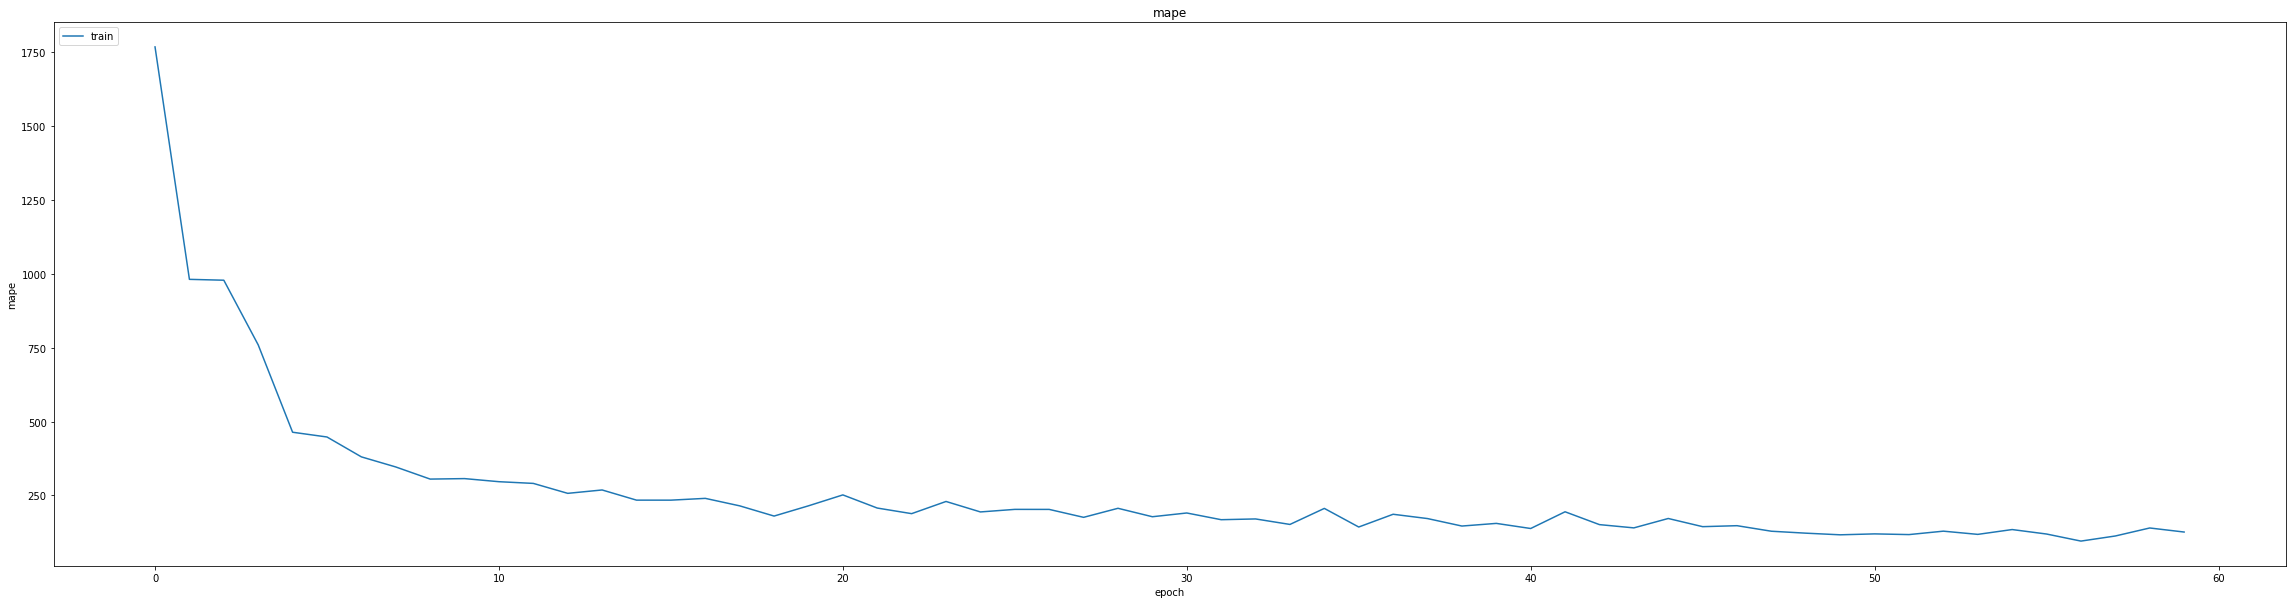

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.005731399171054363
0.008262919262051582
687/687 [==============================] - 27s 38ms/step
0.9989912623637703


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 9.9340e-04 - mae: 0.0110 - mse: 9.9340e-04 - root_mean_squared_error: 0.0315 - mape: 186.1978
Epoch 1: val_mse did not improve from 0.00007
463/463 [==============================] - 319s 666ms/step - loss: 9.9340e-04 - mae: 0.0110 - mse: 9.9340e-04 - root_mean_squared_error: 0.0315 - mape: 186.1978 - val_loss: 7.1091e-05 - val_mae: 0.0061 - val_mse: 7.1091e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 1539.4053 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.9865e-05 - mae: 0.0035 - mse: 1.9865e-05 - root_mean_squared_error: 0.0045 - mape: 127.5990
Epoch 2: val_mse did not improve from 0.00007
463/463 [==============================] - 305s 660ms/step - loss: 1.9865e-05 - mae: 0.0035 - mse: 1.9865e-05 - root_mean_squared_error: 0.0045 - mape: 127.5990 - val_loss: 7.2323e-05 - val_mae: 0.0062 - val_mse: 7.2323e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1480.0757

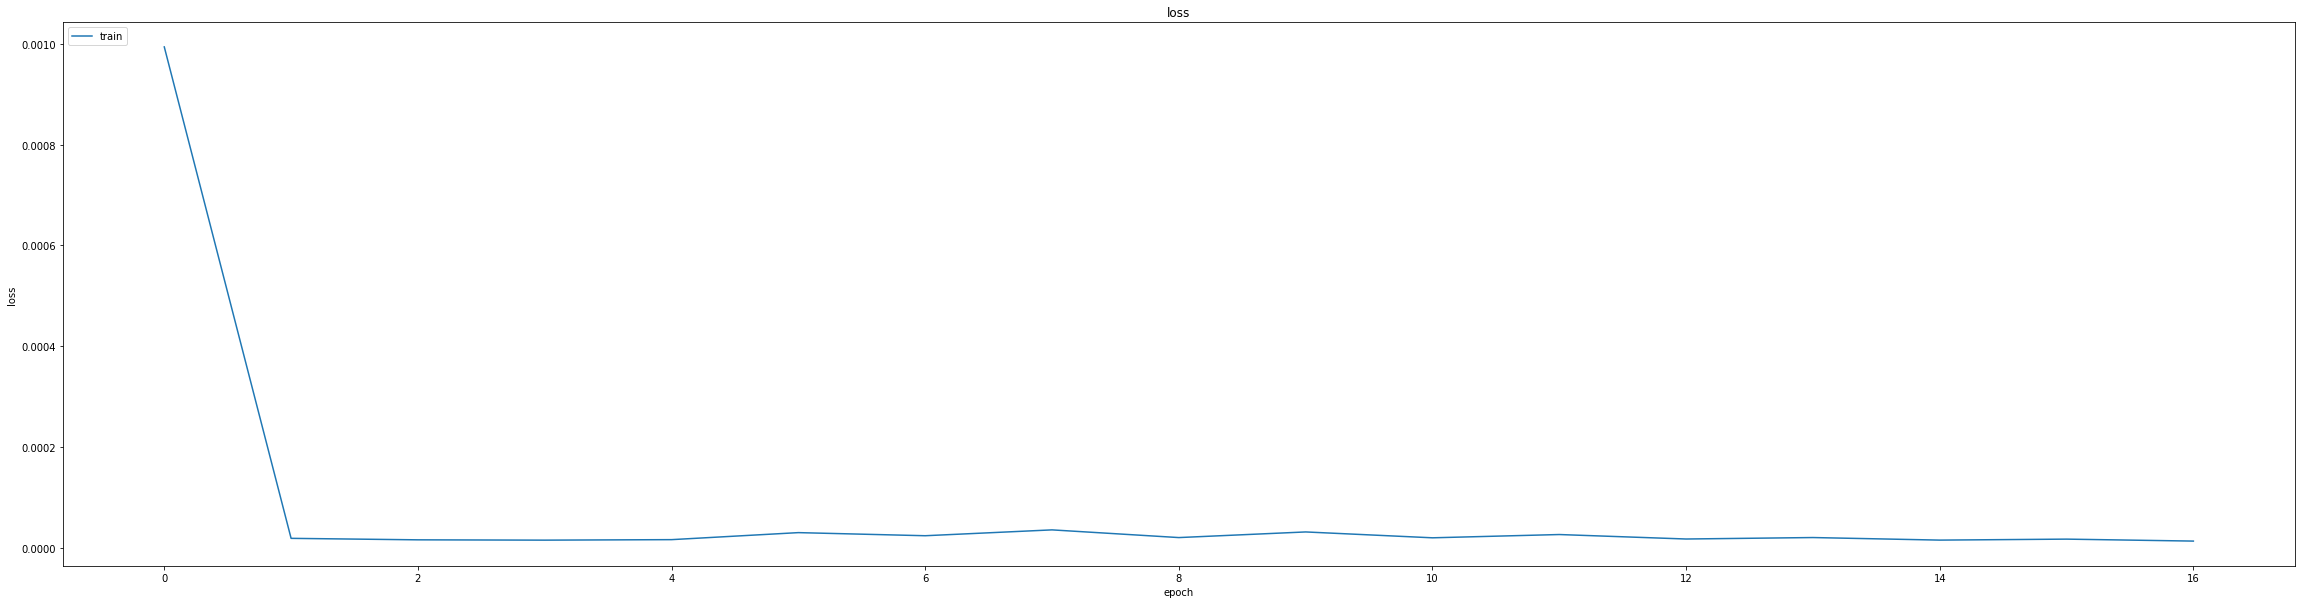

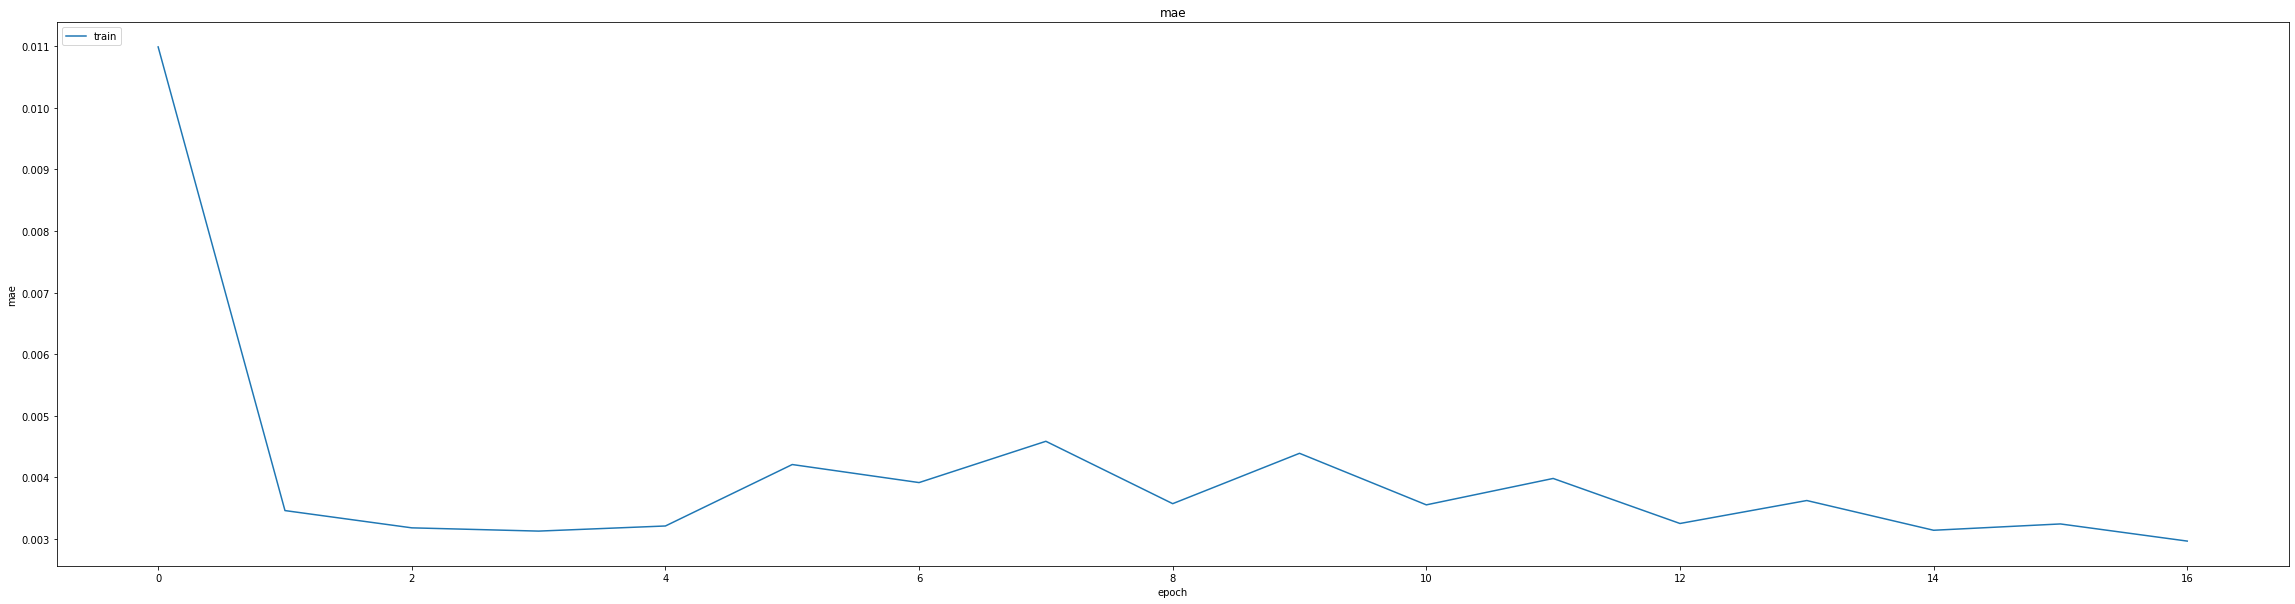

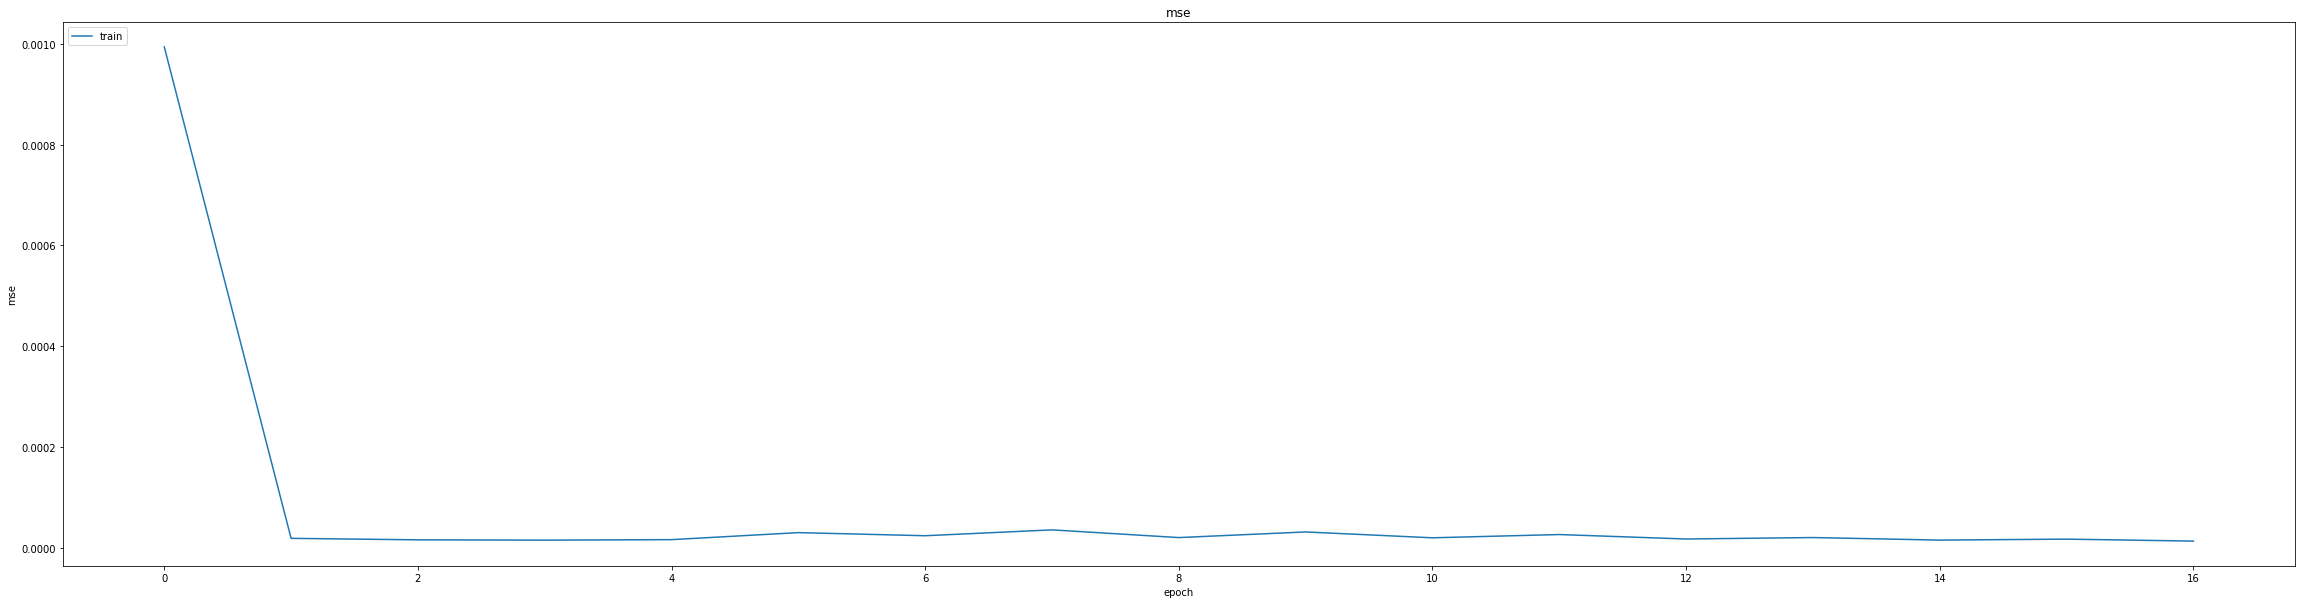

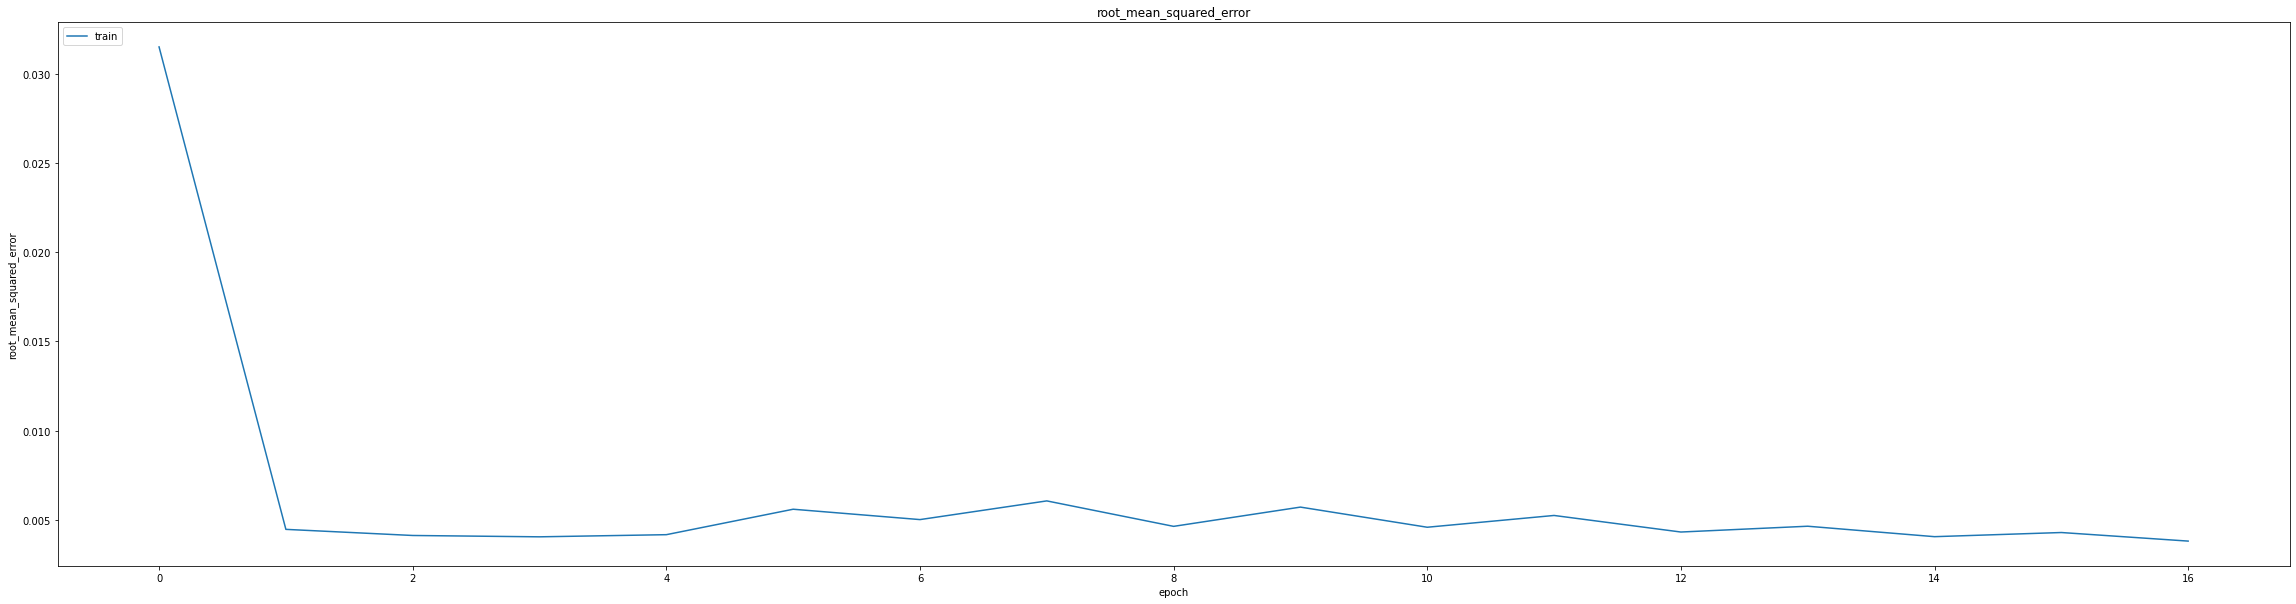

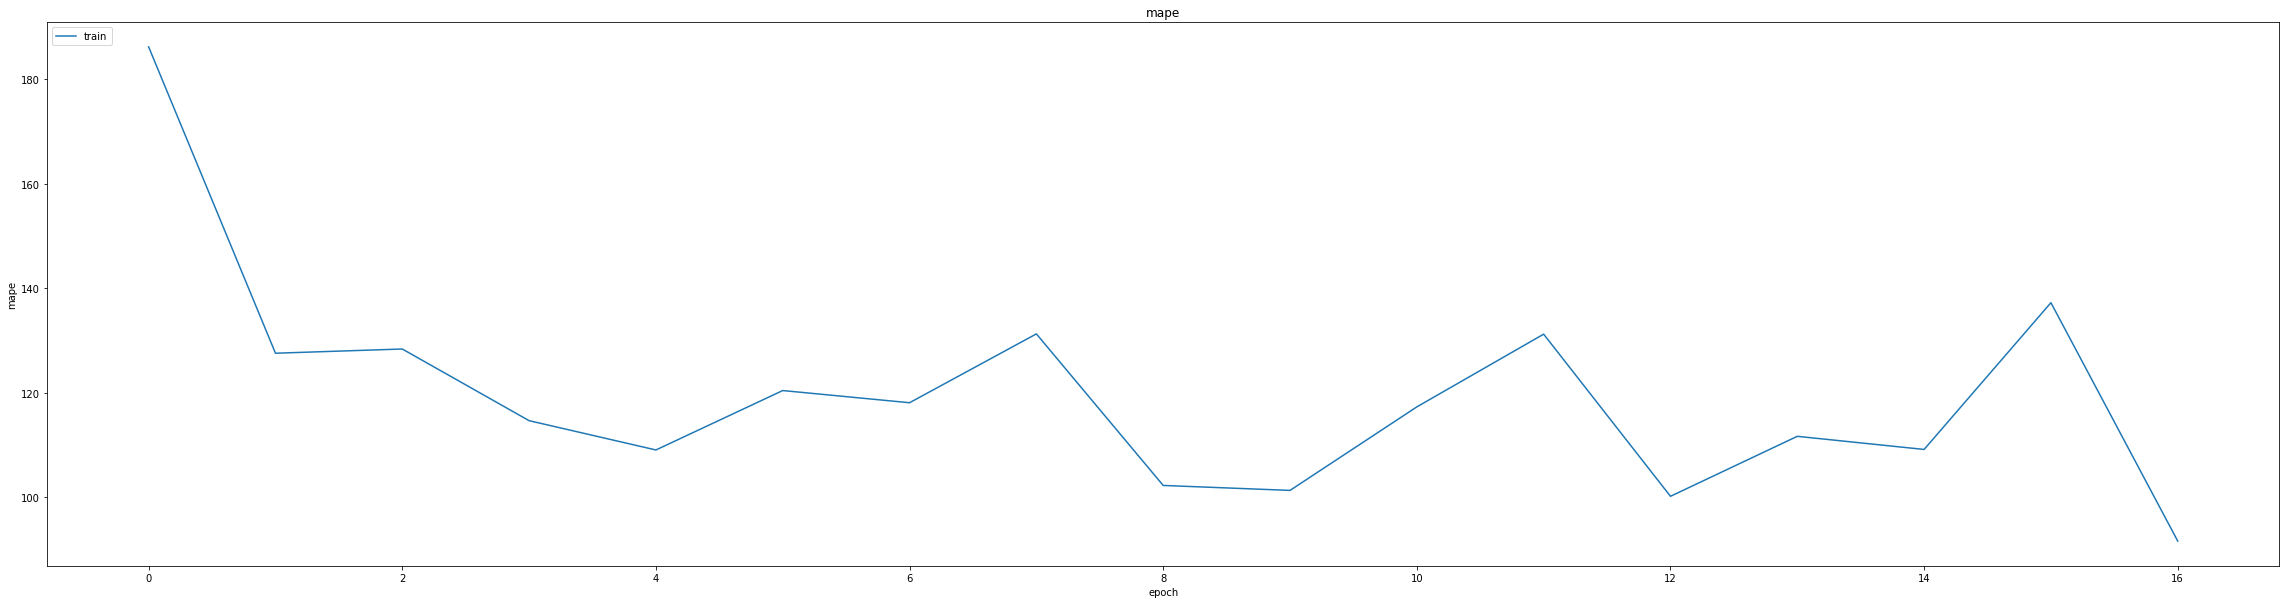

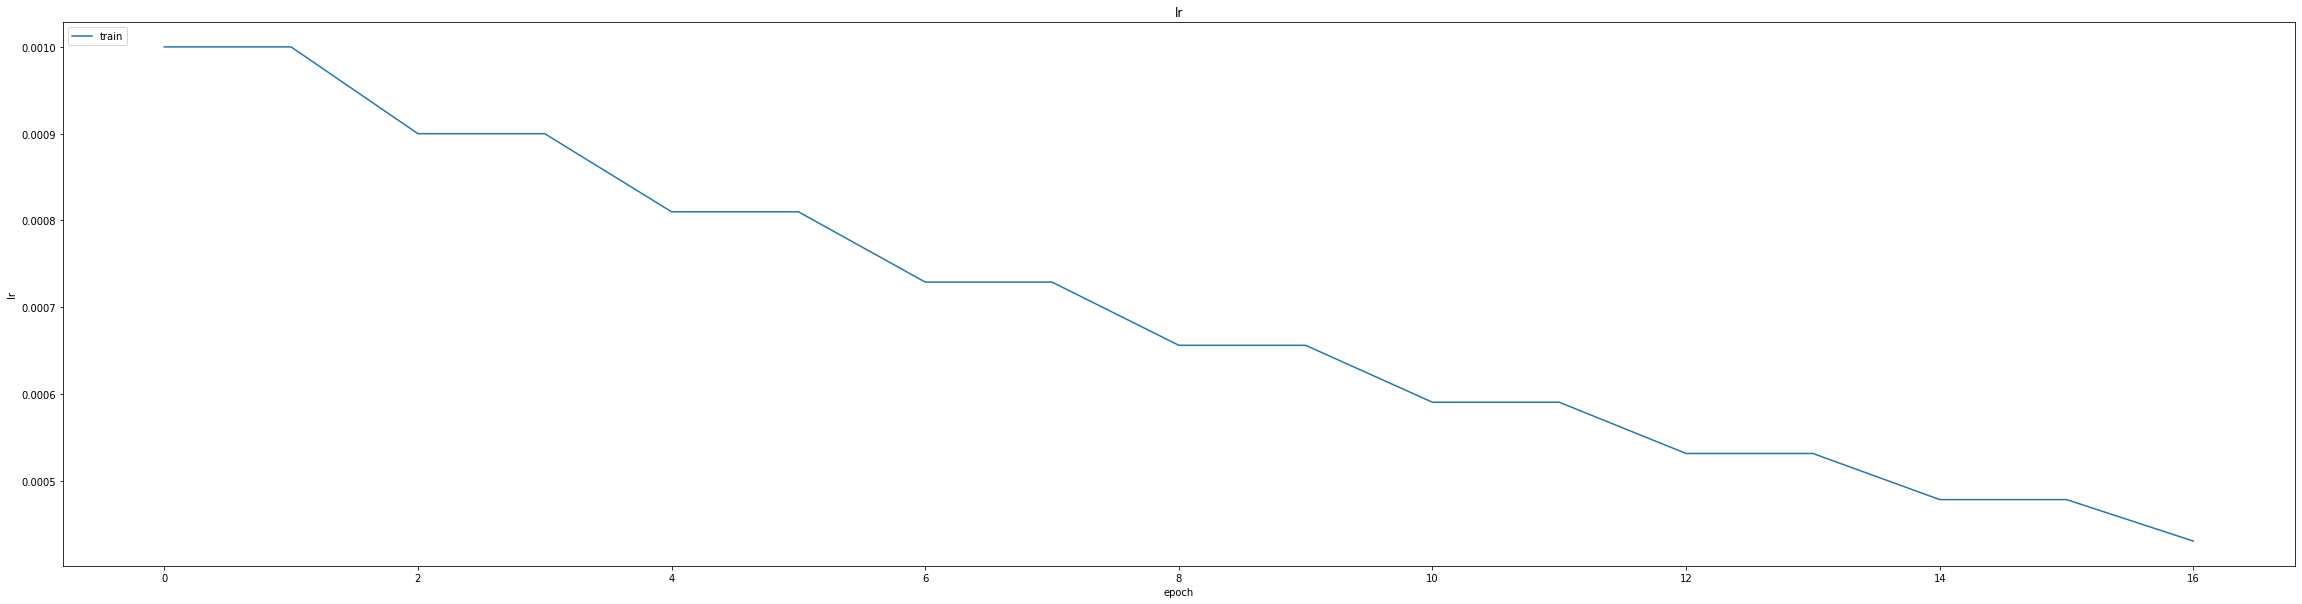

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.0053217047825455666
0.00764647638425231
687/687 [==============================] - 30s 41ms/step
0.9989261176157049


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 24s 35ms/step


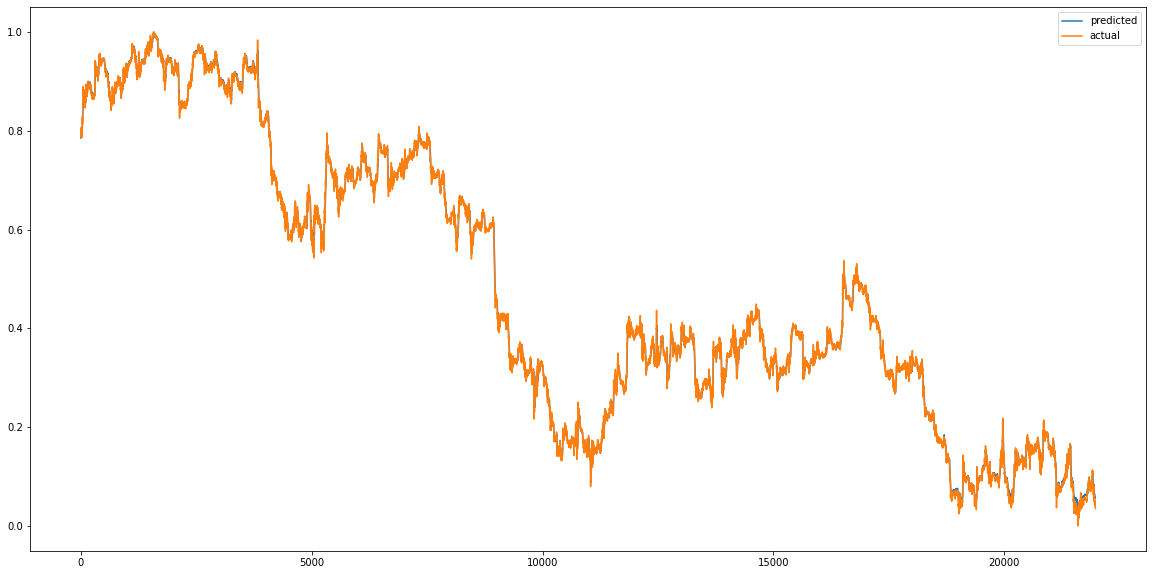

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


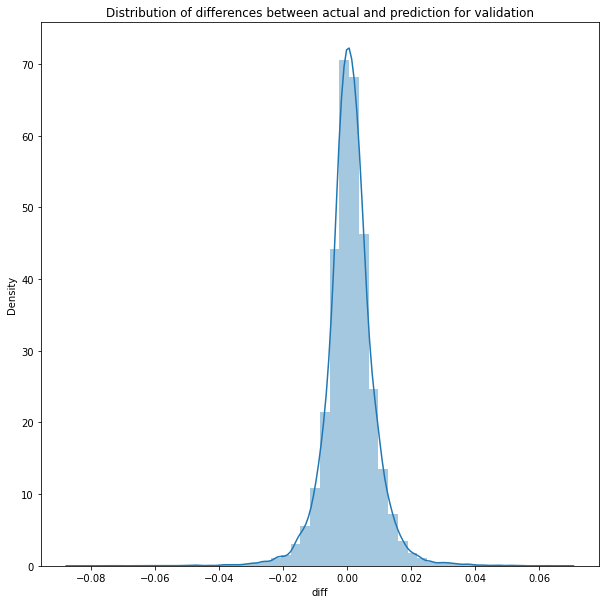

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

705/705 [==============================] - 25s 35ms/step


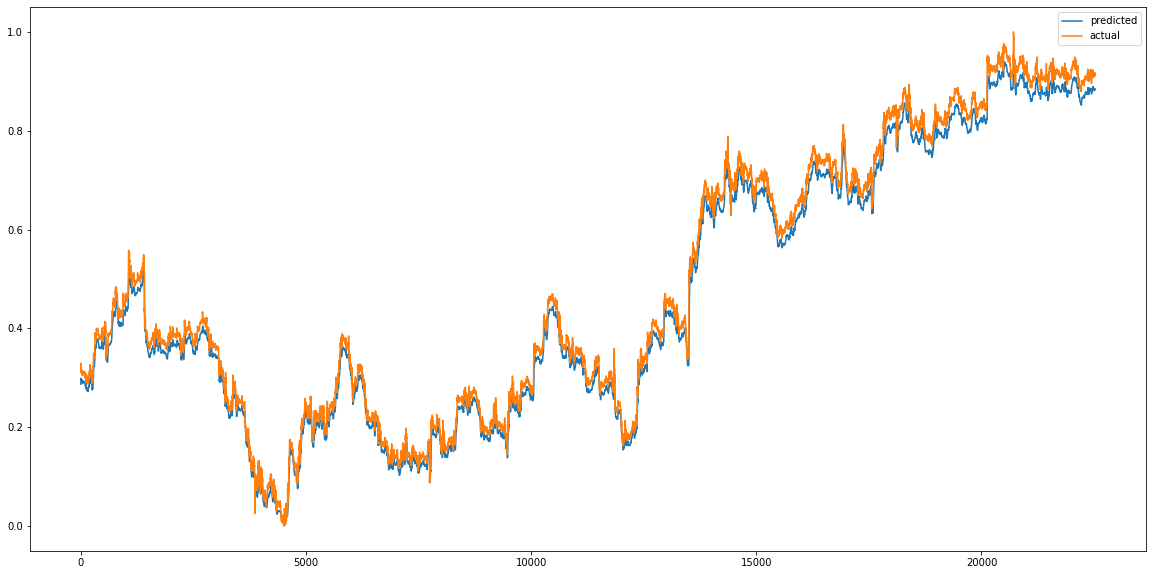

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


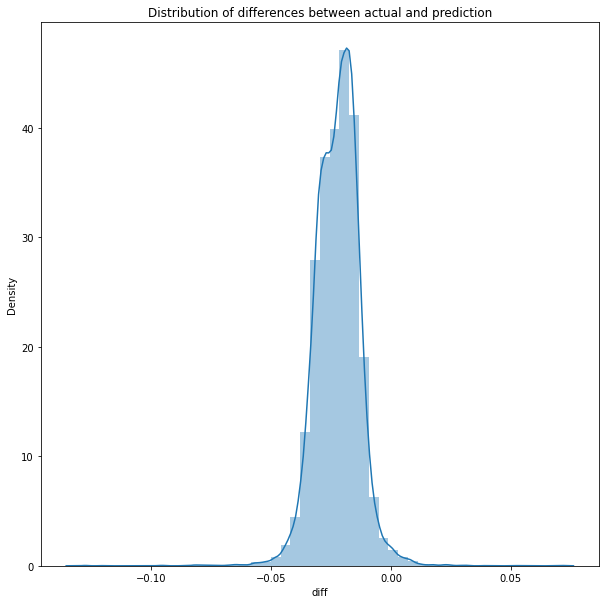

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0005818251084260257
MAE :  0.022486824044421202
RMSE :  0.024121051146789304
705/705 [==============================] - 25s 35ms/step
R2_Score  : 0.9989261176157049


count    22530.000000
mean        -0.022312
std          0.009164
min         -0.131773
25%         -0.028263
50%         -0.021782
75%         -0.016510
max          0.072394
Name: diff, dtype: float64